In [1]:
rm(list=ls())
setwd("/hpc/group/pbenfeylab/CheWei/")

In [2]:
libs <- c("here", "dplyr", "tradeSeq", "SingleCellExperiment", "slingshot",
           "condiments", "scater", "RColorBrewer", "pheatmap", "cowplot",
          "tidyr","condimentsPaper","Seurat")
suppressMessages(
  suppressWarnings(sapply(libs, require, character.only = TRUE))
)

here                dplyr             tradeSeq 
                TRUE                 TRUE                 TRUE 
SingleCellExperiment            slingshot           condiments 
                TRUE                 TRUE                 TRUE 
              scater         RColorBrewer             pheatmap 
                TRUE                 TRUE                 TRUE 
             cowplot                tidyr      condimentsPaper 
                TRUE                 TRUE                FALSE 
              Seurat 
                TRUE

In [3]:
suppressPackageStartupMessages({
  library(slingshot); library(SingleCellExperiment)
  library(RColorBrewer); library(scales)
  library(viridis); library(UpSetR)
  library(pheatmap); library(msigdbr)
  library(fgsea); library(knitr)
  library(ggplot2); library(gridExtra)
  library(tradeSeq);library(Seurat)
  library(tidyverse);library(condiments)
  library(patchwork);library(ComplexHeatmap)
  library(circlize);library(WGCNA)  
  library(tricycle);library(GeneOverlap)
  library(gprofiler2);library(ggrepel)
})

In [4]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: AlmaLinux 9.3 (Shamrock Pampas Cat)

Matrix products: default
BLAS/LAPACK: /hpc/group/pbenfeylab/ch416/miniconda3/envs/seu4/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggrepel_0.9.4               gprofiler2_0.2.2           
 [3] GeneOverlap_1.34.0          tricycle_1.6.0             
 [5] WGCNA_1.72-1                fastcluster_1.2.3          
 [7] dynamicTreeCut_1.63-1       circlize_0.4.15            
 [9] C

In [5]:
rc.integrated <- readRDS("./tricycle/phloem_atlas_seu4_simplified.rds")

In [6]:
head(rc.integrated@meta.data)

orig.ident nCount_RNA nFeature_RNA
APL_AAACCCAAGTAACGTA-1 APL        35383      5176        
APL_AAACCCACAACCAACT-1 APL         6456      3020        
APL_AAACCCACAGTTGAAA-1 APL        12731      3650        
APL_AAACCCAGTGCCTTTC-1 APL         6954      3072        
APL_AAACCCAGTTTCGACA-1 APL         7276      2483        
APL_AAACCCATCTGCGAGC-1 APL         7045      2849        
                       cell_id                sample barcode           
APL_AAACCCAAGTAACGTA-1 APL_AAACCCAAGTAACGTA-1 APL    AAACCCAAGTAACGTA-1
APL_AAACCCACAACCAACT-1 APL_AAACCCACAACCAACT-1 APL    AAACCCACAACCAACT-1
APL_AAACCCACAGTTGAAA-1 APL_AAACCCACAGTTGAAA-1 APL    AAACCCACAGTTGAAA-1
APL_AAACCCAGTGCCTTTC-1 APL_AAACCCAGTGCCTTTC-1 APL    AAACCCAGTGCCTTTC-1
APL_AAACCCAGTTTCGACA-1 APL_AAACCCAGTTTCGACA-1 APL    AAACCCAGTTTCGACA-1
APL_AAACCCATCTGCGAGC-1 APL_AAACCCATCTGCGAGC-1 APL    AAACCCATCTGCGAGC-1
                       total_counts detected_genes cluster annotation        
APL_AAACCCAAGTAACGTA-1 35600        5210           9       early/undetermined
APL_AAACCCACAACCAACT-1  6616        3058           2       PSE               
APL_AAACCCACAGTTGAAA-1 12781        3669           1       MSE               
APL_AAACCCAGTGCCTTTC-1  7138        3100           4       PPP               
APL_AAACCCAGTTTCGACA-1  7364        2529           6       PSE               
APL_AAACCCATCTGCGAGC-1  7114        2869           3       CC                
                       ... prediction.score.T40 prediction.score.T28
APL_AAACCCAAGTAACGTA-1 ... 0.000000000          0.00000000          
APL_AAACCCACAACCAACT-1 ... 0.000000000          0.00000000          
APL_AAACCCACAGTTGAAA-1 ... 0.000000000          0.00000000          
APL_AAACCCAGTGCCTTTC-1 ... 0.000000000          0.00000000          
APL_AAACCCAGTTTCGACA-1 ... 0.004908478          0.00000000          
APL_AAACCCATCTGCGAGC-1 ... 0.000000000          0.08276203          
                       prediction.score.T11 prediction.score.T39
APL_AAACCCAAGTAACGTA-1 0.00000000           0.000000            
APL_AAACCCACAACCAACT-1 0.04052317           0.000000            
APL_AAACCCACAGTTGAAA-1 0.00000000           0.000000            
APL_AAACCCAGTGCCTTTC-1 0.01507838           0.000000            
APL_AAACCCAGTTTCGACA-1 0.00000000           0.139904            
APL_AAACCCATCTGCGAGC-1 0.00000000           0.000000            
                       prediction.score.T45 prediction.score.T31
APL_AAACCCAAGTAACGTA-1 0                    0.000000000         
APL_AAACCCACAACCAACT-1 0                    0.000000000         
APL_AAACCCACAGTTGAAA-1 0                    0.003022812         
APL_AAACCCAGTGCCTTTC-1 0                    0.000000000         
APL_AAACCCAGTTTCGACA-1 0                    0.005391760         
APL_AAACCCATCTGCGAGC-1 0                    0.007452301         
                       prediction.score.T20 consensus.time.group.50
APL_AAACCCAAGTAACGTA-1 0.01163433           T0                     
APL_AAACCCACAACCAACT-1 0.00000000           T23                    
APL_AAACCCACAGTTGAAA-1 0.02580615           T21                    
APL_AAACCCAGTGCCTTTC-1 0.14251363           T18                    
APL_AAACCCAGTTTCGACA-1 0.00000000           T33                    
APL_AAACCCATCTGCGAGC-1 0.00000000           T27                    
                       time.anno.Li.crude   celltype.anno.Li.crude
APL_AAACCCAAGTAACGTA-1 Proliferation Domain Endodermis            
APL_AAACCCACAACCAACT-1 Proliferation Domain Phloem                
APL_AAACCCACAGTTGAAA-1 Proliferation Domain Phloem                
APL_AAACCCAGTGCCTTTC-1 Elongation           Pericycle             
APL_AAACCCAGTTTCGACA-1 Maturation           Phloem                
APL_AAACCCATCTGCGAGC-1 Proliferation Domain Phloem

In [7]:
table(rc.integrated$orig.ident)


      APL     MAKR5 MAKR5diff   PEARdel       S17      sAPL 
     5360       542      2022       649      1461       170 

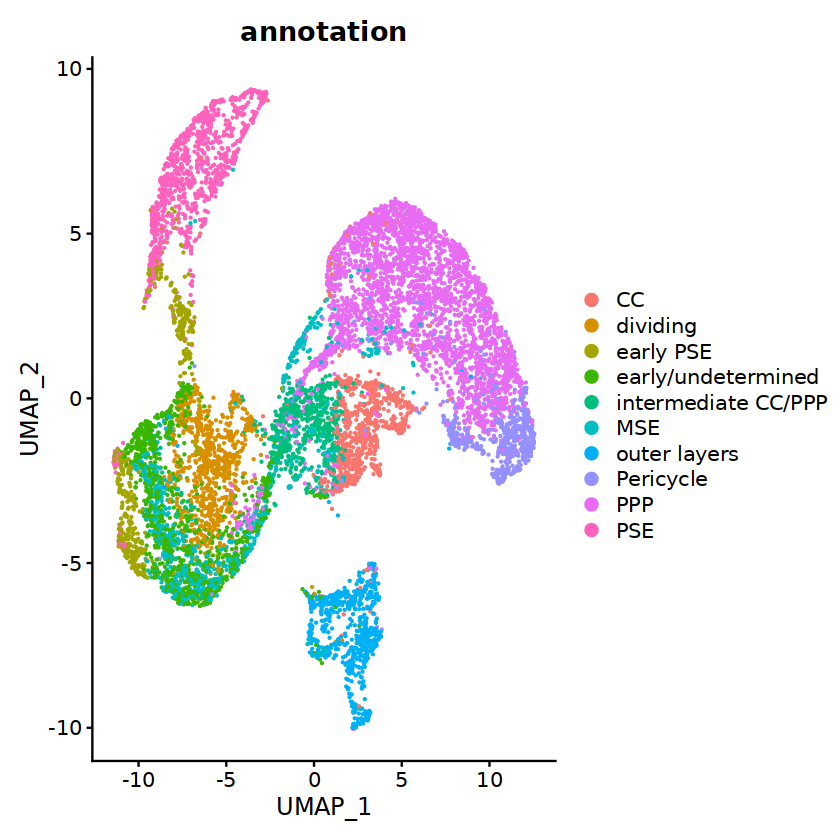

In [8]:
DimPlot(rc.integrated, reduction = "umap", group.by = "annotation")

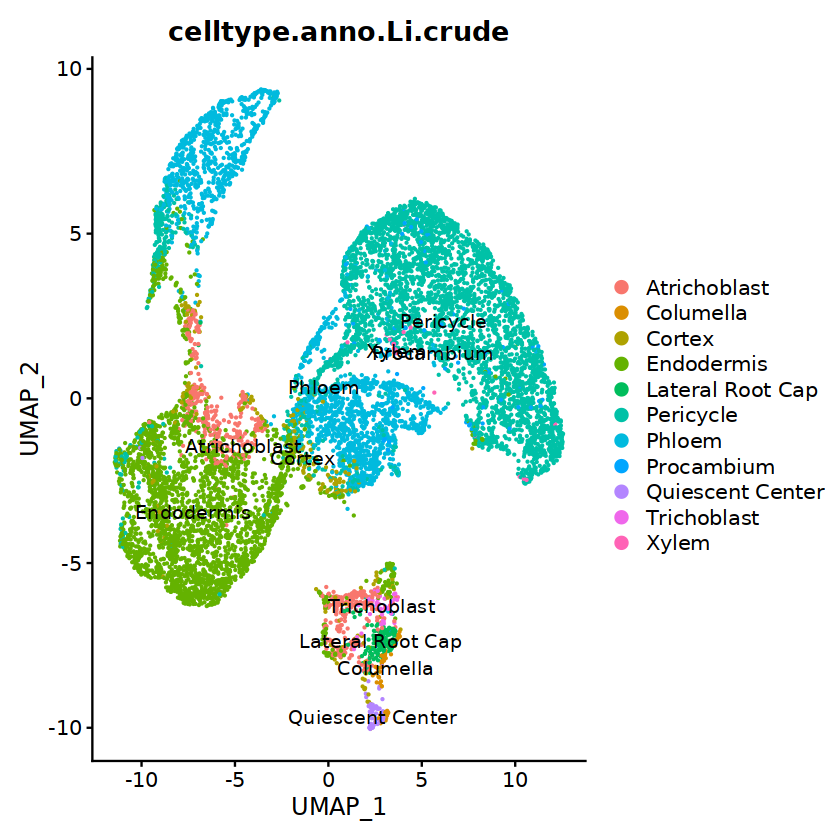

In [9]:
DimPlot(rc.integrated, reduction = "umap", group.by = "celltype.anno.Li.crude", label=TRUE)

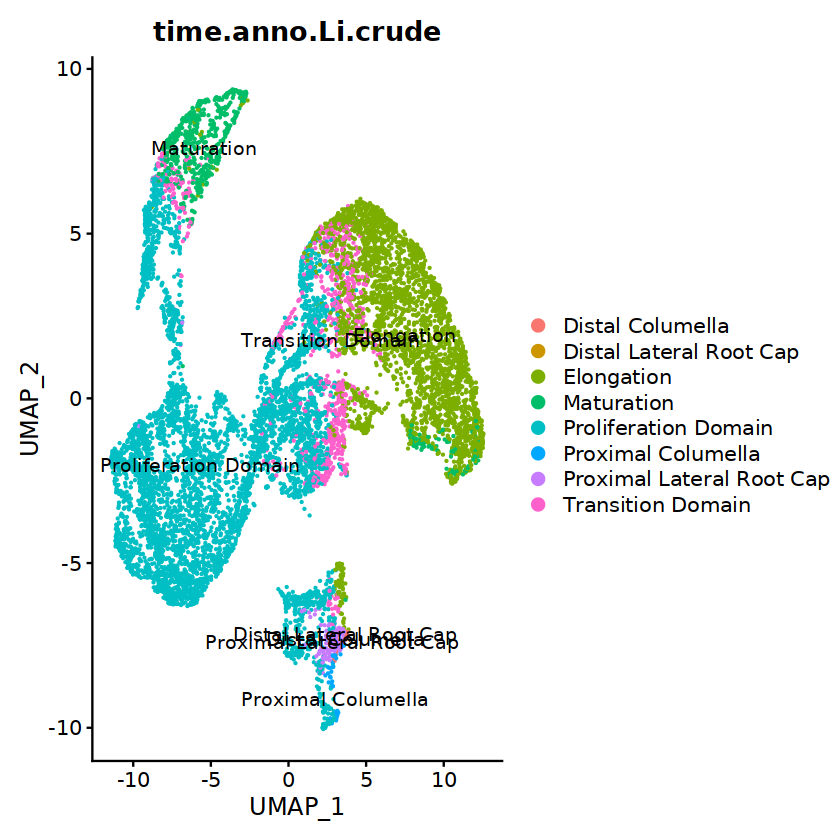

In [10]:
DimPlot(rc.integrated, reduction = "umap", group.by = "time.anno.Li.crude", label=TRUE)

In [11]:
rc.integrated

An object of class Seurat 
17396 features across 10204 samples within 1 assay 
Active assay: RNA (17396 features, 17396 variable features)
 2 dimensional reductions calculated: pca, umap

In [12]:
rc.integrated <- subset(rc.integrated, cells=colnames(rc.integrated)[which(rc.integrated$annotation=="dividing" | rc.integrated$annotation=="early PSE" | rc.integrated$annotation=="early/undetermined"| rc.integrated$annotation=="PSE"| rc.integrated$annotation=="MSE" | rc.integrated$annotation=="CC")])

In [13]:
rc.integrated <- subset(rc.integrated, cells=colnames(rc.integrated)[which(rc.integrated$time.anno.Li.crude=="Proliferation Domain")])

In [14]:
rc.integrated

An object of class Seurat 
17396 features across 3645 samples within 1 assay 
Active assay: RNA (17396 features, 17396 variable features)
 2 dimensional reductions calculated: pca, umap

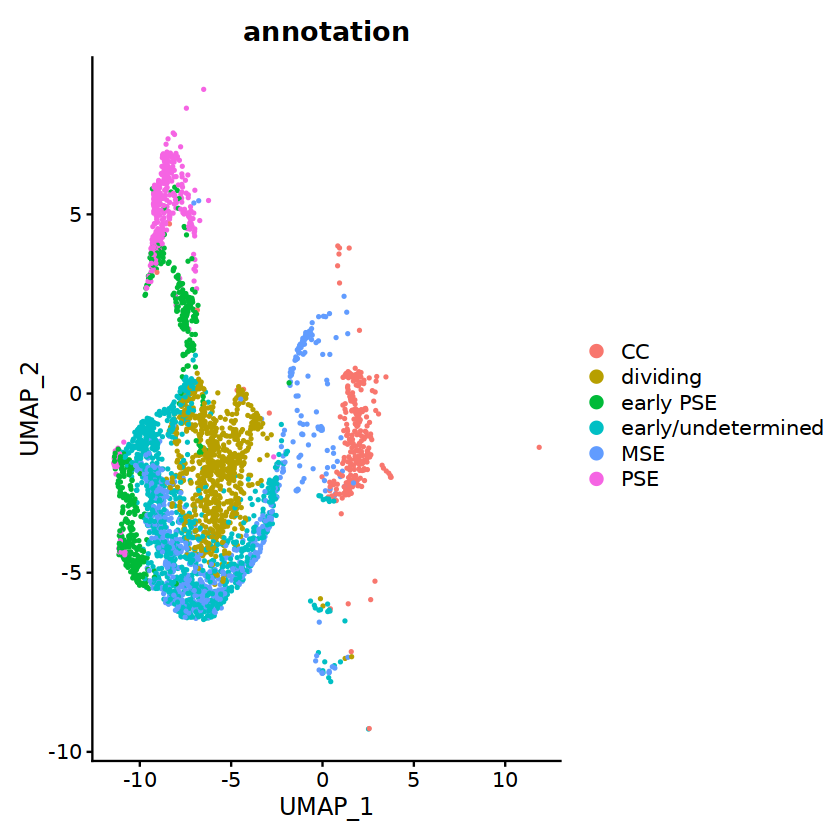

In [15]:
DimPlot(rc.integrated, reduction = "umap", group.by = "annotation")

In [16]:
wanted_cols <- c("orig.ident", "annotation", "tricyclePosition","tricycleCCStage")
rc.integrated@meta.data <- rc.integrated@meta.data[,wanted_cols]
colnames(rc.integrated@meta.data) <- c("sample", "annotation","tricyclePosition","tricycleCCStage")

In [17]:
table(rc.integrated$sample)


      APL     MAKR5 MAKR5diff   PEARdel       S17      sAPL 
     1244       389      1563       357        43        49 

In [18]:
ccgl <- read.csv("./tradeseq/245_cell_cycle_related_genes_for_reference.csv")
ccgl <- ccgl$GeneID

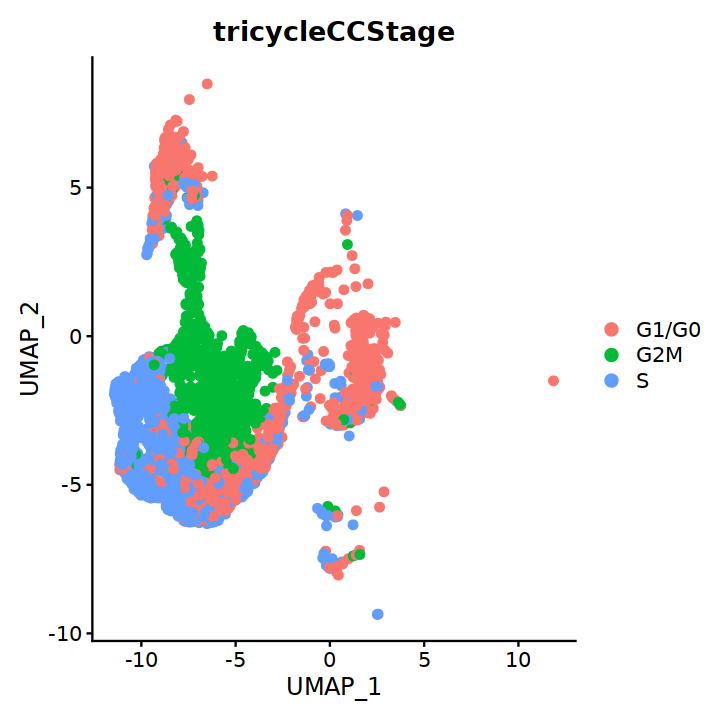

In [19]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(rc.integrated, reduction = "umap", group.by = "tricycleCCStage", label = FALSE, pt.size=2)

In [20]:
table(rc.integrated$tricycleCCStage)


G1/G0   G2M     S 
 1177  1129  1339 

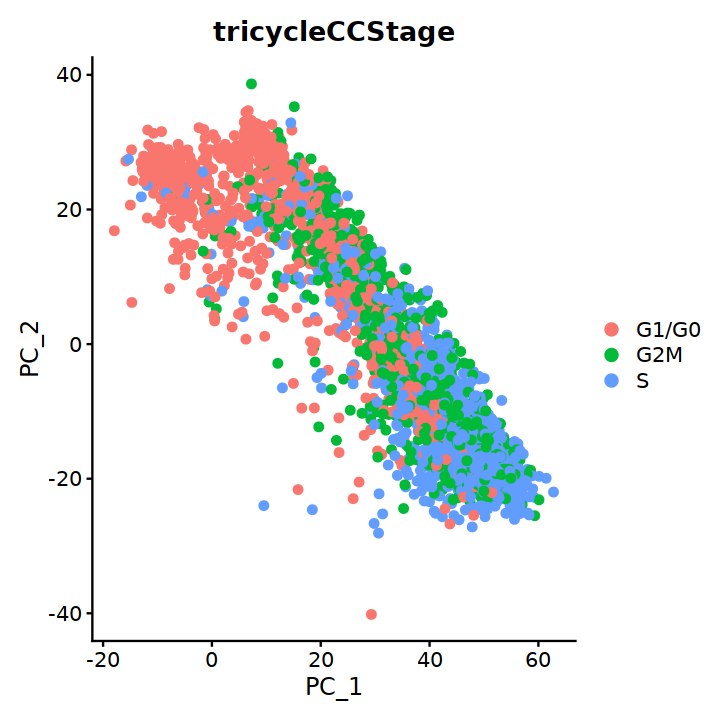

In [21]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(rc.integrated, reduction = "pca", group.by = "tricycleCCStage", label = FALSE, pt.size=2)

In [37]:
rc.integrated <- RunPCA(rc.integrated,features = ccgl)
rc.integrated <- FindNeighbors(rc.integrated, dims = 1:10)
rc.integrated <- RunUMAP(rc.integrated, dims = 1:10)

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 3 features requested have not been scaled (running reduction without them): AT5G47500, AT1G33670, AT5G05900”
PC_ 1 
Positive:  AT5G55520, AT4G05190, AT1G16630, AT5G51600, AT4G14330, AT1G76310, AT4G26660, AT1G02730, AT4G01730, AT4G38062 
	   AT3G11520, AT1G03780, AT3G56100, AT3G15550, AT4G09060, AT1G20610, AT2G22610, AT5G60930, AT3G44050, AT1G18370 
	   AT3G23670, AT5G45700, AT4G35620, AT4G37490, AT3G55660, AT5G15510, AT5G56120, AT3G58650, AT3G26050, AT1G34355 
Negative:  AT3G12170, AT5G52220, AT2G20980, AT3G48490, AT1G80190, AT2G44580, AT4G00020, AT2G29680, AT3G23740, AT3G52115 
	   AT4G30860, AT4G31400, AT2G24970, AT1G75150, AT1G26330, AT3G13060, AT4G12620, AT2G37560, AT3G24495, AT1G20720 
	   AT3G27640, AT4G21070, AT3G62110, AT3G05740, AT3G59550, AT3G25100, AT3G18730, AT2G42190, AT1G07270, AT5G46740 
PC_ 2 
Positive:  AT1G07020, AT3G62110, AT5G56120, AT3G13060, AT5G15510, AT2G42190, AT4

In [41]:
#rc.integrated[["umap"]]@cell.embeddings[,1] <- rc.integrated[["umap"]]@cell.embeddings[,1]*-1
rc.integrated[["umap"]]@cell.embeddings[,2] <- rc.integrated[["umap"]]@cell.embeddings[,2]*-1
#u2 <- rc.integrated@reductions$umap@cell.embeddings[,1]
#u1 <- rc.integrated@reductions$umap@cell.embeddings[,2]
#rc.integrated@reductions$umap@cell.embeddings[,1] <- u1
#rc.integrated@reductions$umap@cell.embeddings[,2] <- u2

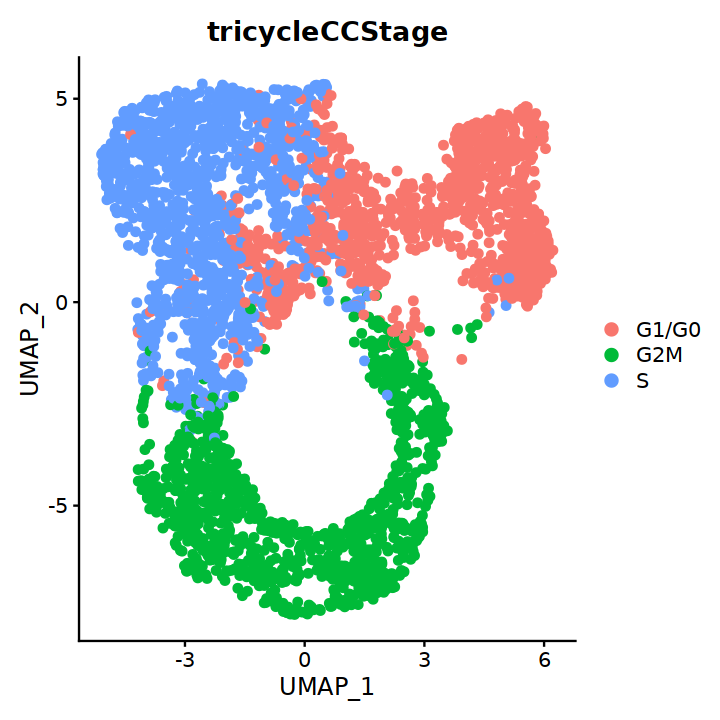

In [42]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(rc.integrated, reduction = "umap", group.by = "tricycleCCStage", label = FALSE, pt.size=2)

In [43]:
grDevices::cairo_pdf("./pdfs/Phloem_atlas_Proliferation_Domain_cells_UMAP_with_245_CCgenes.pdf",width=6, height=6)
print(DimPlot(rc.integrated, reduction = "umap", group.by = "tricycleCCStage", label = FALSE, pt.size=2))
dev.off()

png 
  2

In [44]:
sce <- as.SingleCellExperiment(rc.integrated)

In [45]:
sce$tricyclePosition <- rc.integrated$tricyclePosition*pi

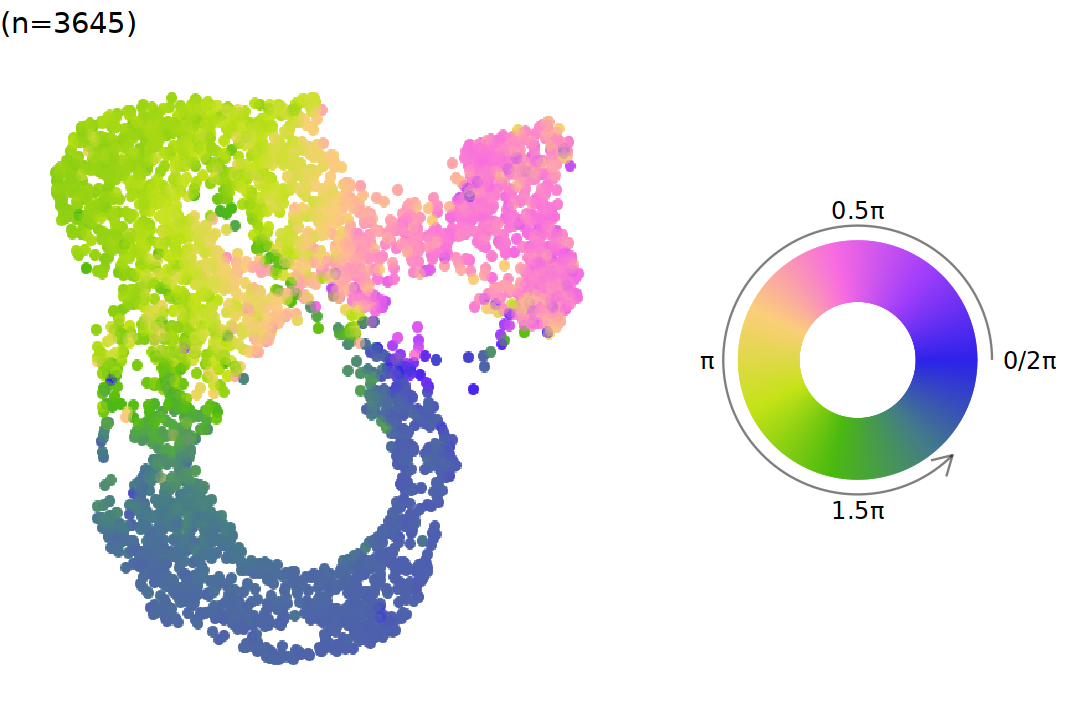

In [46]:
options(repr.plot.width=9, repr.plot.height=6)
## Tricycle position on umap
p <- plot_emb_circle_scale(sce, dimred = "UMAP",
                       point.size = 5, point.alpha = 1) +
  theme_void(base_size = 14)
legend <- circle_scale_legend(text.size = 5, alpha = 1)
print(plot_grid(p, legend, ncol = 2, rel_widths = c(1, 0.7)))

In [47]:
grDevices::cairo_pdf("./pdfs/Phloem_atlas_Proliferation_Domain_cells_UMAP_tricyclePosition_with_245_CCgenes.pdf",width=9, height=6)
print(plot_grid(p, legend, ncol = 2, rel_widths = c(1, 0.7)))
dev.off()

png 
  2

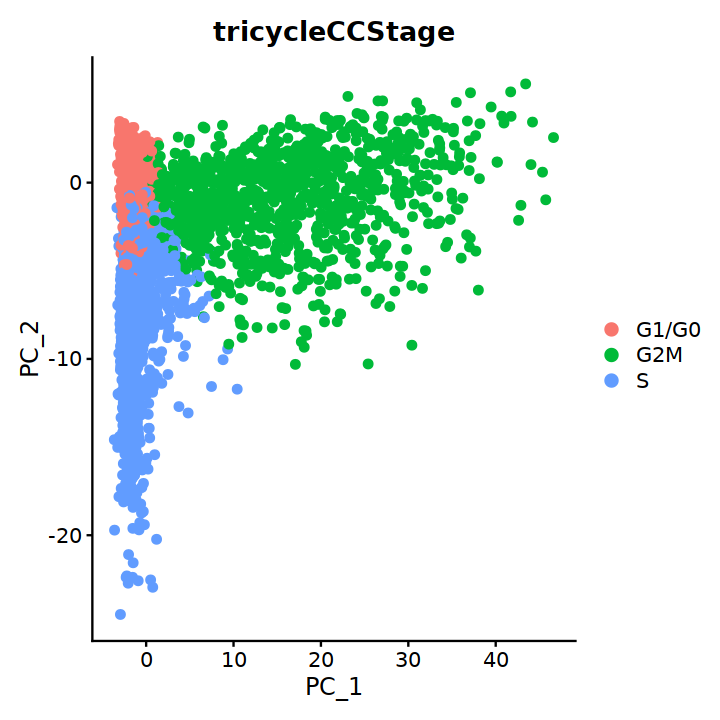

In [48]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(rc.integrated, reduction = "pca", group.by = "tricycleCCStage", label = FALSE, pt.size=2)

## Inspect gene expression over tricycle position

In [49]:
pltsg <- function(gene){
    keygene.idx <- which(rownames(rc.integrated@assays$RNA@data) == gene)
    fit.l <- fit_periodic_loess(rc.integrated$tricyclePosition*pi,
                            rc.integrated@assays$RNA@data[keygene.idx,],
                            plot = FALSE, span=0.3,
                       x_lab = "Cell cycle position \u03b8", y_lab = "log2(keygene)")
    fit <- fit.l$pred.df
    options(repr.plot.width=8, repr.plot.height=6)
    print(ggplot(fit, aes(x=x,y=y)) + geom_path(size = 1, alpha = 1)+ labs(x = "θ", y = "smoothed gene expression", title = gene) + 
                scale_x_continuous(limits = c(0, 2 * pi), breaks = c(0, 
                    pi/2, pi, 3 * pi/2, 2 * pi), labels = paste0(c(0, 
                    0.5, 1, 1.5, 2), "π"), name = "θ")+
      #              scale_x_continuous(limits = c(0, 200), breaks = c(0, 
      #              50, 100, 150, 200), labels = paste0(c(0, 
      #              0.5, 1, 1.5, 2), "π"), name = "θ")+
      theme_bw(base_size = 14)+
      theme(legend.title=element_blank()))
} 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


png 
  2

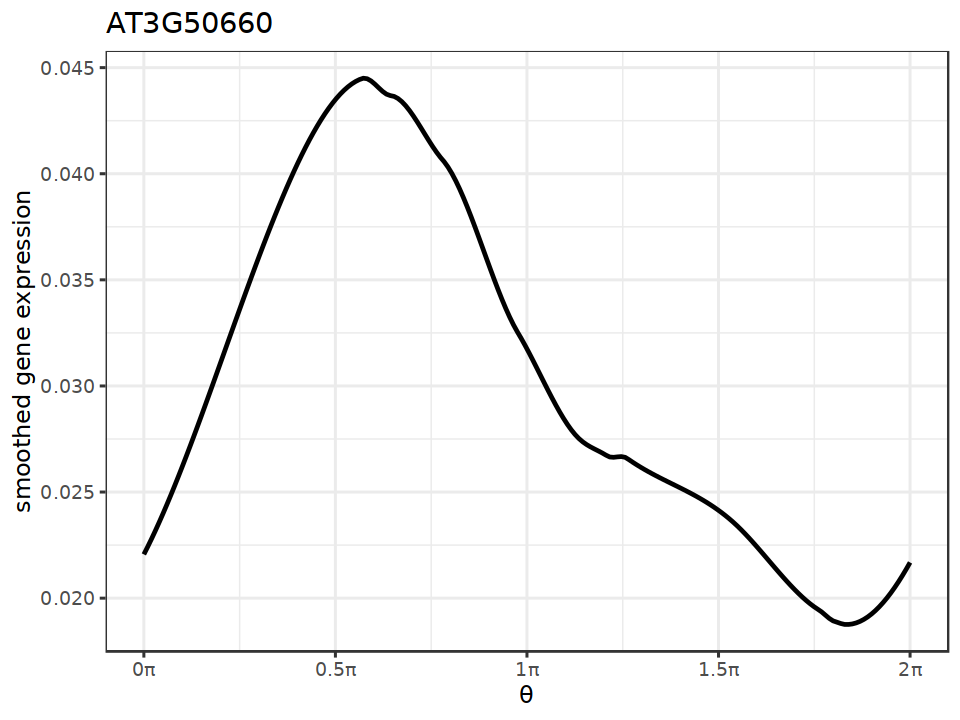

In [50]:
## DWF4
grDevices::cairo_pdf("Phloem_atlas_DWF4.pdf",width=8, height=6)
pltsg('AT3G50660')
dev.off()

pltsg('AT3G50660')

png 
  2

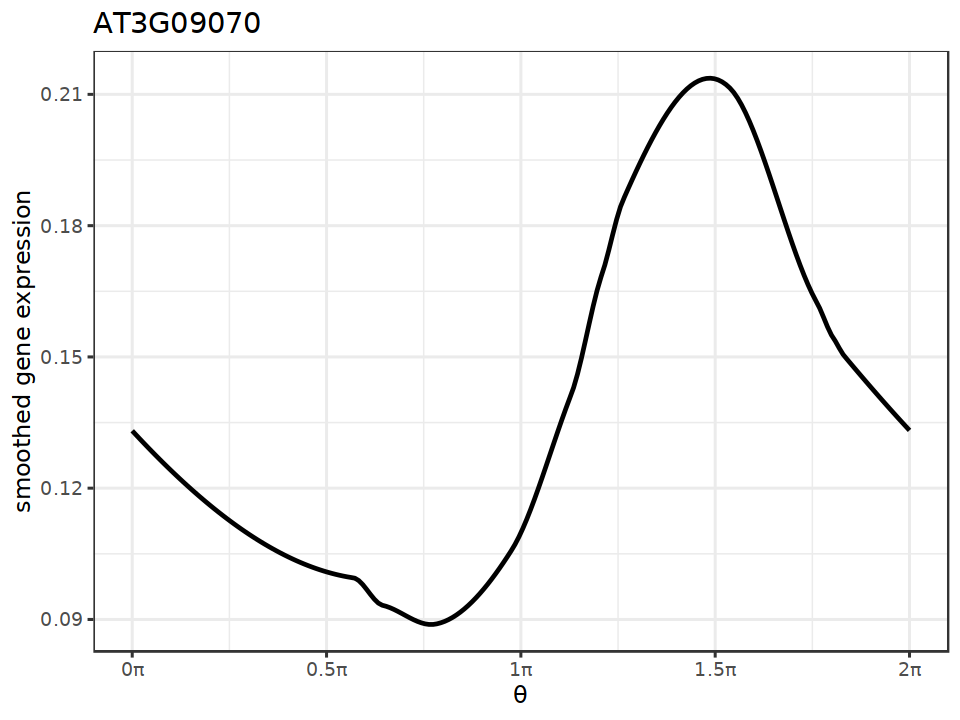

In [51]:
## OPS
grDevices::cairo_pdf("Phloem_atlas_OPS.pdf",width=8, height=6)
pltsg('AT3G09070')
dev.off()

pltsg('AT3G09070')

png 
  2

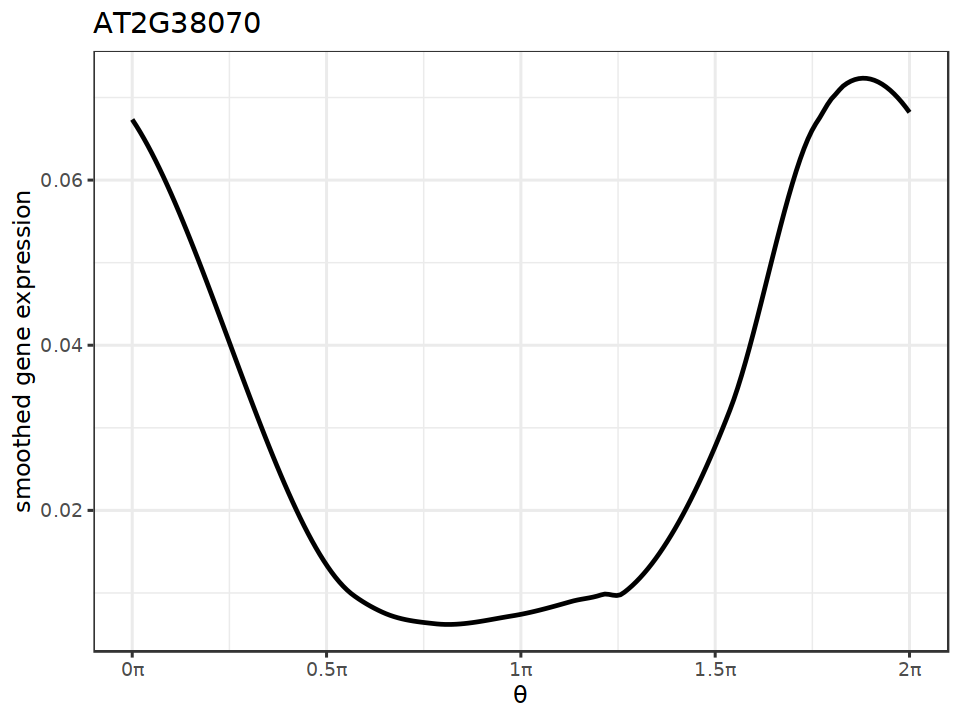

In [52]:
## OPL2
grDevices::cairo_pdf("Phloem_atlas_OPL2.pdf",width=8, height=6)
pltsg('AT2G38070')
dev.off()

pltsg('AT2G38070')

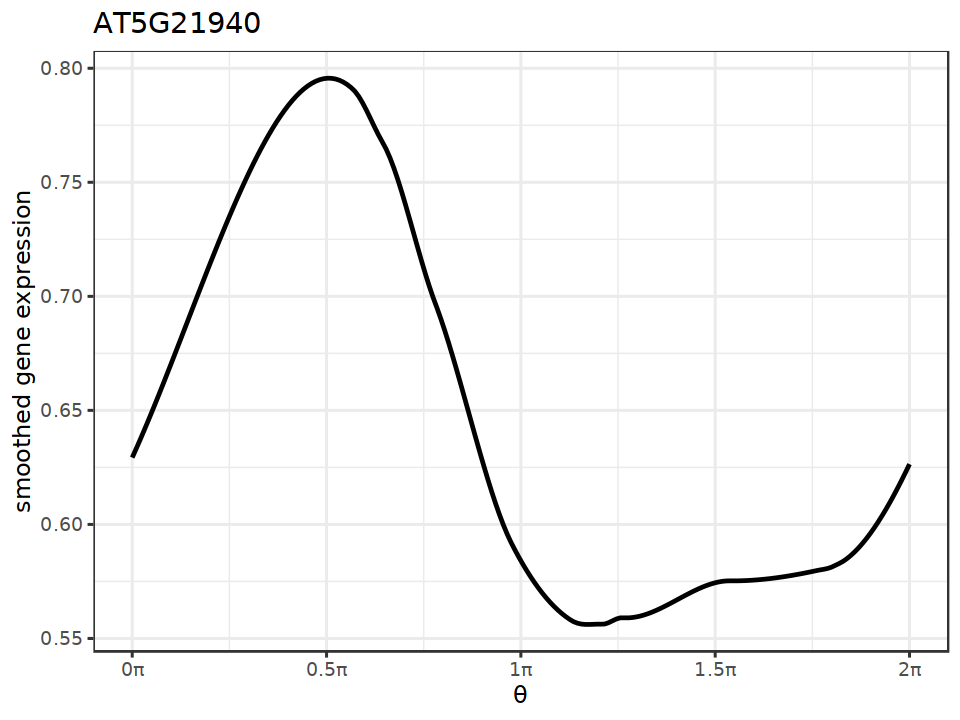

In [53]:
## G1 marker reported by Laura Lee
pltsg('AT5G21940')

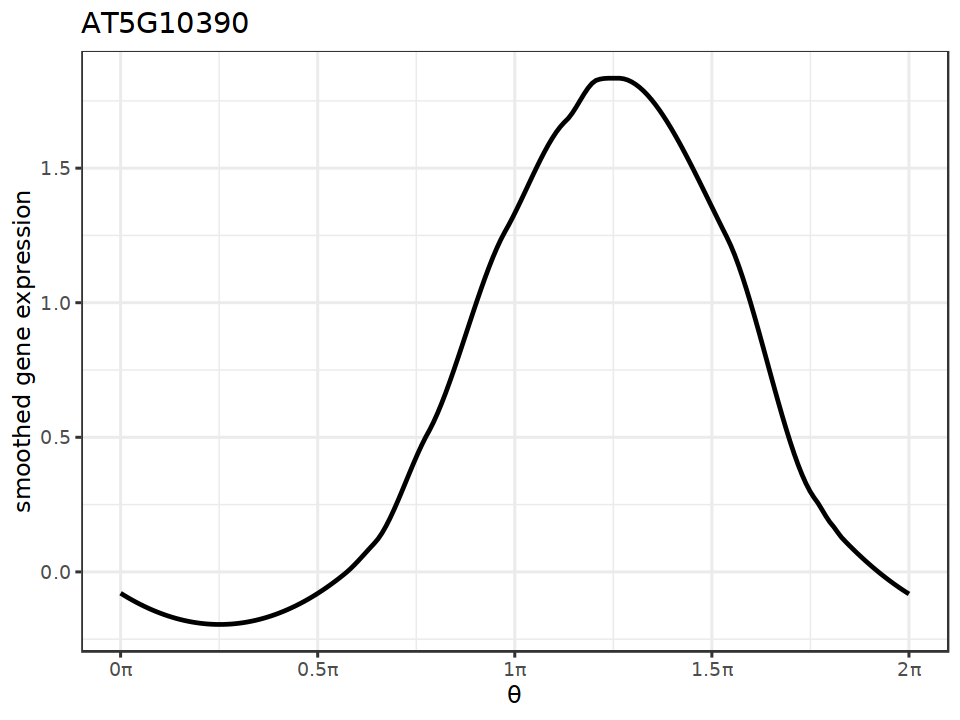

In [54]:
## S marker reported by Laura Lee
pltsg('AT5G10390')

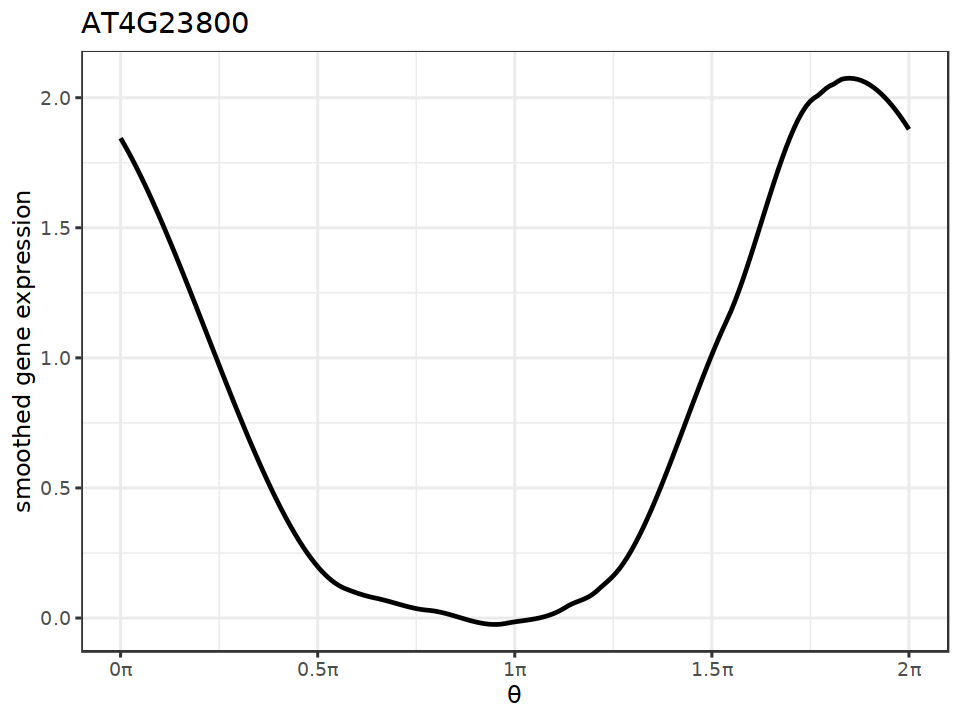

In [55]:
## G2M marker reported by Laura Lee
pltsg('AT4G23800')

## Load gene lists

In [22]:
DefaultAssay(rc.integrated) <- "RNA"

In [23]:
nrow(rc.integrated)

[1] 17396

In [24]:
GL <- read.csv("./tradeseq/BES1_BZR1_2X_ChIP_targets.csv")
GL <- intersect(GL$GeneID,rownames(rc.integrated))
GL2 <- read.csv("./tradeseq/BES1_BZR1_target_BL2hr_vs_BRZ.csv")
GL2up <- GL2 %>% filter(BL2hr_vs_BRZ=="BES1_Target_BL_up")
GL2up <- intersect(GL2up$GeneID, rownames(rc.integrated))
GL2down <- GL2 %>% filter(BL2hr_vs_BRZ=="BES1_Target_BL_down")
GL2down <- intersect(GL2down$GeneID, rownames(rc.integrated))
GL2mixed <- GL2 %>% filter(BL2hr_vs_BRZ=="BES1_Target_BL_mixed")
GL2mixed <- intersect(GL2mixed$GeneID, rownames(rc.integrated))
GL3 <- read.csv("./tradeseq/MYB3R4_Targets.csv")
GL3 <- intersect(GL3$GeneID, rownames(rc.integrated))

In [25]:
DE <- read.csv("./tradeseq/v4_BL2hr_v_BRZ_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv", row.names = 1)
DE <- DE %>% filter(cluster_id == "Proliferation Domain_Atrichoblast")
head(DE)

gene      cluster_id                        sc_2.cpm sc_43.cpm sc_50.cpm
1 AT3G50660 Proliferation Domain_Atrichoblast  66.5     53.90     58.10   
2 AT4G36780 Proliferation Domain_Atrichoblast 227.0    167.00    196.00   
3 AT4G01630 Proliferation Domain_Atrichoblast  12.0      6.87     11.50   
4 AT2G43890 Proliferation Domain_Atrichoblast   2.4      1.77      2.28   
5 AT4G16780 Proliferation Domain_Atrichoblast  54.0     57.00     56.20   
6 AT1G07985 Proliferation Domain_Atrichoblast 162.0    176.00    228.00   
  sc_5.cpm sc_46.cpm sc_49.cpm sc_2.frq sc_43.frq ... F   p_val    p_adj.loc
1   3.04     1.22      1.31    0.7780   0.6530    ... 603 1.14e-26 2.56e-22 
2  17.90    12.50     12.70    0.9490   0.8930    ... 551 6.89e-26 7.70e-22 
3 209.00   142.00    142.00    0.2530   0.1480    ... 508 3.38e-25 2.52e-21 
4 110.00    31.40     41.30    0.0606   0.0473    ... 454 2.98e-24 1.67e-20 
5   3.99     4.29      5.76    0.6870   0.7080    ... 406 2.55e-23 1.14e-19 
6  23.00    21.80     16.40    0.8990   0.7460    ... 363 2.25e-22 8.40e-19 
  p_adj.glb contrast Name      TF_Name Description         up_dn_label
1 7.02e-21  BL-BRZ   CYP90B1   NA      NA                  Down       
2 4.22e-20  BL-BRZ   BEH2      BEH2    BES1/BZR1 homolog 2 Down       
3 2.07e-19  BL-BRZ   EXPA17    NA      NA                  Up         
4 1.83e-18  BL-BRZ   AT2G43890 NA      NA                  Up         
5 1.56e-17  BL-BRZ   HAT4      HB-2    homeobox protein 2  Down       
6 1.38e-16  BL-BRZ   AT1G07985 NA      NA                  Down       
  clust_up_dn                           
1 Proliferation Domain_Atrichoblast_Down
2 Proliferation Domain_Atrichoblast_Down
3 Proliferation Domain_Atrichoblast_Up  
4 Proliferation Domain_Atrichoblast_Up  
5 Proliferation Domain_Atrichoblast_Down
6 Proliferation Domain_Atrichoblast_Down

## Prepare data for WCGNA

In [60]:
rc.integrated

An object of class Seurat 
17396 features across 3645 samples within 1 assay 
Active assay: RNA (17396 features, 17396 variable features)
 2 dimensional reductions calculated: pca, umap

In [61]:
table(rc.integrated$sample)


      APL     MAKR5 MAKR5diff   PEARdel       S17      sAPL 
     1244       389      1563       357        43        49 

In [62]:
y.list <- c()
for (gene in rownames(rc.integrated)){
keygene.idx <- which(rownames(rc.integrated) == gene)
fit.l <- fit_periodic_loess(rc.integrated$tricyclePosition*pi,
                            rc.integrated@assays$RNA@data[keygene.idx,],
                            plot = FALSE, span=0.3,
                       x_lab = "Cell cycle position \u03b8", y_lab = "log2(keygene)")
fit <- fit.l$pred.df

y.list <- cbind(y.list,fit$y)
}

In [63]:
colnames(y.list) <- rownames(rc.integrated)

In [64]:
write.csv(y.list, "./tradeseq/All_genes_Phloem_atlas_cells_tricycle.csv")

In [65]:
y.list <- read.csv("./tradeseq/All_genes_Phloem_atlas_cells_tricycle.csv", row.names=1)
y.list <- as.matrix(y.list)

In [66]:
head(y.list)

AT1G01010   AT1G01020 AT1G01030   AT1G01040  AT1G01050 AT1G01060  
1 0.002851638 0.2683734 0.003660250 0.04952332 1.143598  0.003388342
2 0.002795392 0.2686408 0.003610621 0.04977569 1.151058  0.003366945
3 0.002740628 0.2689324 0.003559951 0.05004624 1.158525  0.003351505
4 0.002687371 0.2692476 0.003508313 0.05033416 1.165993  0.003341862
5 0.002635642 0.2695857 0.003455783 0.05063863 1.173452  0.003337858
6 0.002585466 0.2699458 0.003402434 0.05095885 1.180896  0.003339333
  AT1G01070   AT1G01080   AT1G01090 AT1G01100 ... AT5G67540  AT5G67560
1 0.003808542 0.008276280 0.5827933 3.244628  ... 0.09487781 0.3355283
2 0.003894708 0.008181032 0.5820764 3.241383  ... 0.09600374 0.3379792
3 0.003980497 0.008088692 0.5813535 3.238083  ... 0.09714855 0.3404688
4 0.004065793 0.007999323 0.5806256 3.234734  ... 0.09831048 0.3429935
5 0.004150478 0.007912987 0.5798939 3.231341  ... 0.09948777 0.3455497
6 0.004234435 0.007829746 0.5791595 3.227909  ... 0.10067866 0.3481336
  AT5G67570  AT5G67580  AT5G67590 AT5G67600 AT5G67610  AT5G67620    AT5G67630
1 0.05438583 0.06066394 0.9769679 1.477855  0.06591079 0.0004477556 0.1659255
2 0.05449268 0.06167051 0.9805964 1.487969  0.06539267 0.0004734249 0.1629890
3 0.05461508 0.06271770 0.9841949 1.498229  0.06488493 0.0005001382 0.1600546
4 0.05475236 0.06380337 0.9877611 1.508621  0.06438769 0.0005278472 0.1571250
5 0.05490387 0.06492541 0.9912926 1.519131  0.06390105 0.0005565033 0.1542029
6 0.05506895 0.06608167 0.9947872 1.529747  0.06342511 0.0005860584 0.1512911
  AT5G67640 
1 0.07384151
2 0.07338066
3 0.07292797
4 0.07248405
5 0.07204952
6 0.07162501

In [67]:
nrow(y.list)

[1] 200

In [68]:
## Remove zeros in y.list()
y.list <- y.list[,-as.numeric(which(colSums(y.list)==0))]

In [69]:
ncol(y.list)

[1] 17386

## WGCNA

In [70]:
allowWGCNAThreads()

Allowing multi-threading with up to 94 threads.


In [71]:
# Choose a set of soft-thresholding powers
powers = c(c(1:100))

In [72]:
# Call the network topology analysis function
sft = pickSoftThreshold(
  y.list,             # <= Input data
  #blockSize = 30,
  powerVector = powers,
  verbose = 5
  )

pickSoftThreshold: will use block size 2573.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2573 of 17386
   ..working on genes 2574 through 5146 of 17386
   ..working on genes 5147 through 7719 of 17386
   ..working on genes 7720 through 10292 of 17386
   ..working on genes 10293 through 12865 of 17386
   ..working on genes 12866 through 15438 of 17386
   ..working on genes 15439 through 17386 of 17386
    Power SFT.R.sq     slope truncated.R.sq mean.k. median.k. max.k.
1       1 8.96e-01  4.250000         0.9000   10900     11900  13100
2       2 8.51e-01  2.070000         0.8600    8360      9370  11200
3       3 7.54e-01  1.260000         0.7090    6880      7750  10000
4       4 6.52e-01  0.732000         0.5550    5890      6600   9140
5       5 5.30e-01  0.486000         0.4280    5170      5720   8450
6       6 3.67e-01  0.318000         0.2970    4620      5040   7880
7       7 2.14e-01  0.208000         0.1800    4170      448

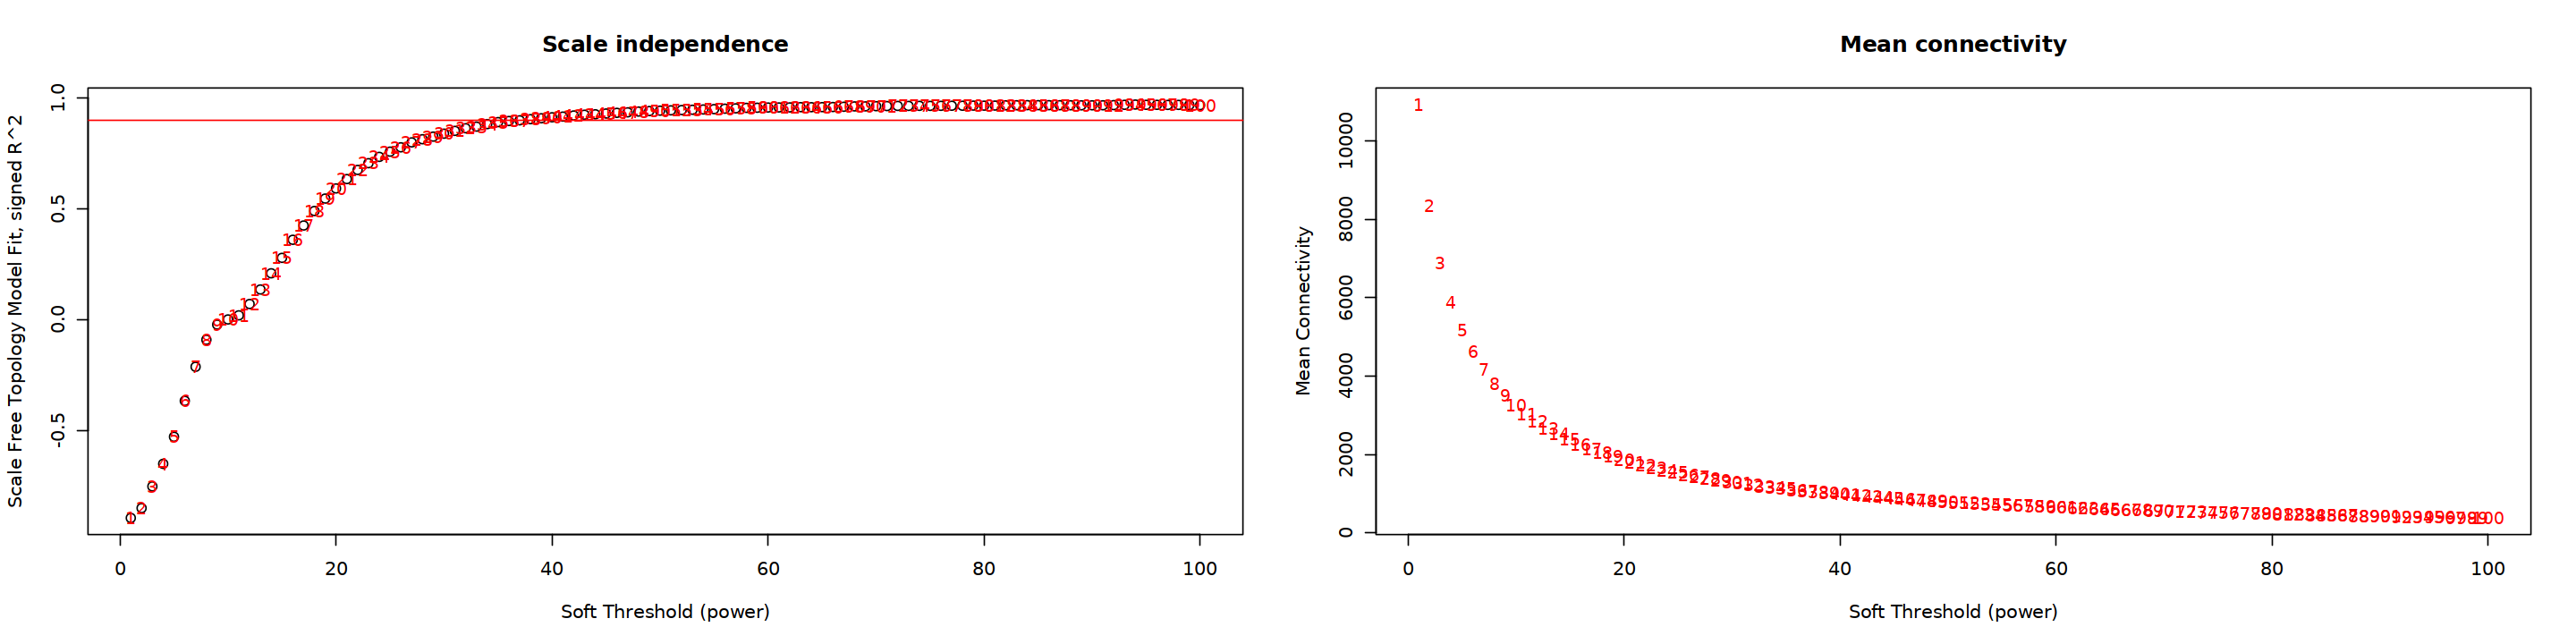

In [73]:
options(repr.plot.width=24, repr.plot.height=6)
par(mfrow = c(1,2));
cex1 = 0.9;

plot(sft$fitIndices[, 1],
     -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
     xlab = "Soft Threshold (power)",
     ylab = "Scale Free Topology Model Fit, signed R^2",
     main = paste("Scale independence")
)
text(sft$fitIndices[, 1],
     -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
     labels = powers, cex = cex1, col = "red"
)
abline(h = 0.90, col = "red")
plot(sft$fitIndices[, 1],
     sft$fitIndices[, 5],
     xlab = "Soft Threshold (power)",
     ylab = "Mean Connectivity",
     type = "n",
     main = paste("Mean connectivity")
)
text(sft$fitIndices[, 1],
     sft$fitIndices[, 5],
     labels = powers,
     cex = cex1, col = "red")

In [74]:
picked_power = 30
temp_cor <- cor       
cor <- WGCNA::cor         # Force it to use WGCNA cor function (fix a namespace conflict issue)
netwk <- blockwiseModules(y.list,                # <= input here

                          # == Adjacency Function ==
                          power = picked_power,                # <= power here
                          networkType = "signed",

                          # == Tree and Block Options ==
                          deepSplit = 2,
                          pamRespectsDendro = F,
                          # detectCutHeight = 0.75,
                          minModuleSize = 200,
                          maxBlockSize = 4000,

                          # == Module Adjustments ==
                          reassignThreshold = 0,
                          mergeCutHeight = 0.25,

                          # == TOM == Archive the run results in TOM file (saves time)
                          saveTOMs = T,
                          saveTOMFileBase = "ER",

                          # == Output Options
                          numericLabels = T,
                          verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3    4    5    6 
3874 3289 3234 2974 2659 1356 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 94 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file ER-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 1 genes from module 1 because their KME is too low.
     ..removing 10 genes from module 2 because their KME is too low.
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will use 94 parallel threads.
     Fraction of slow 

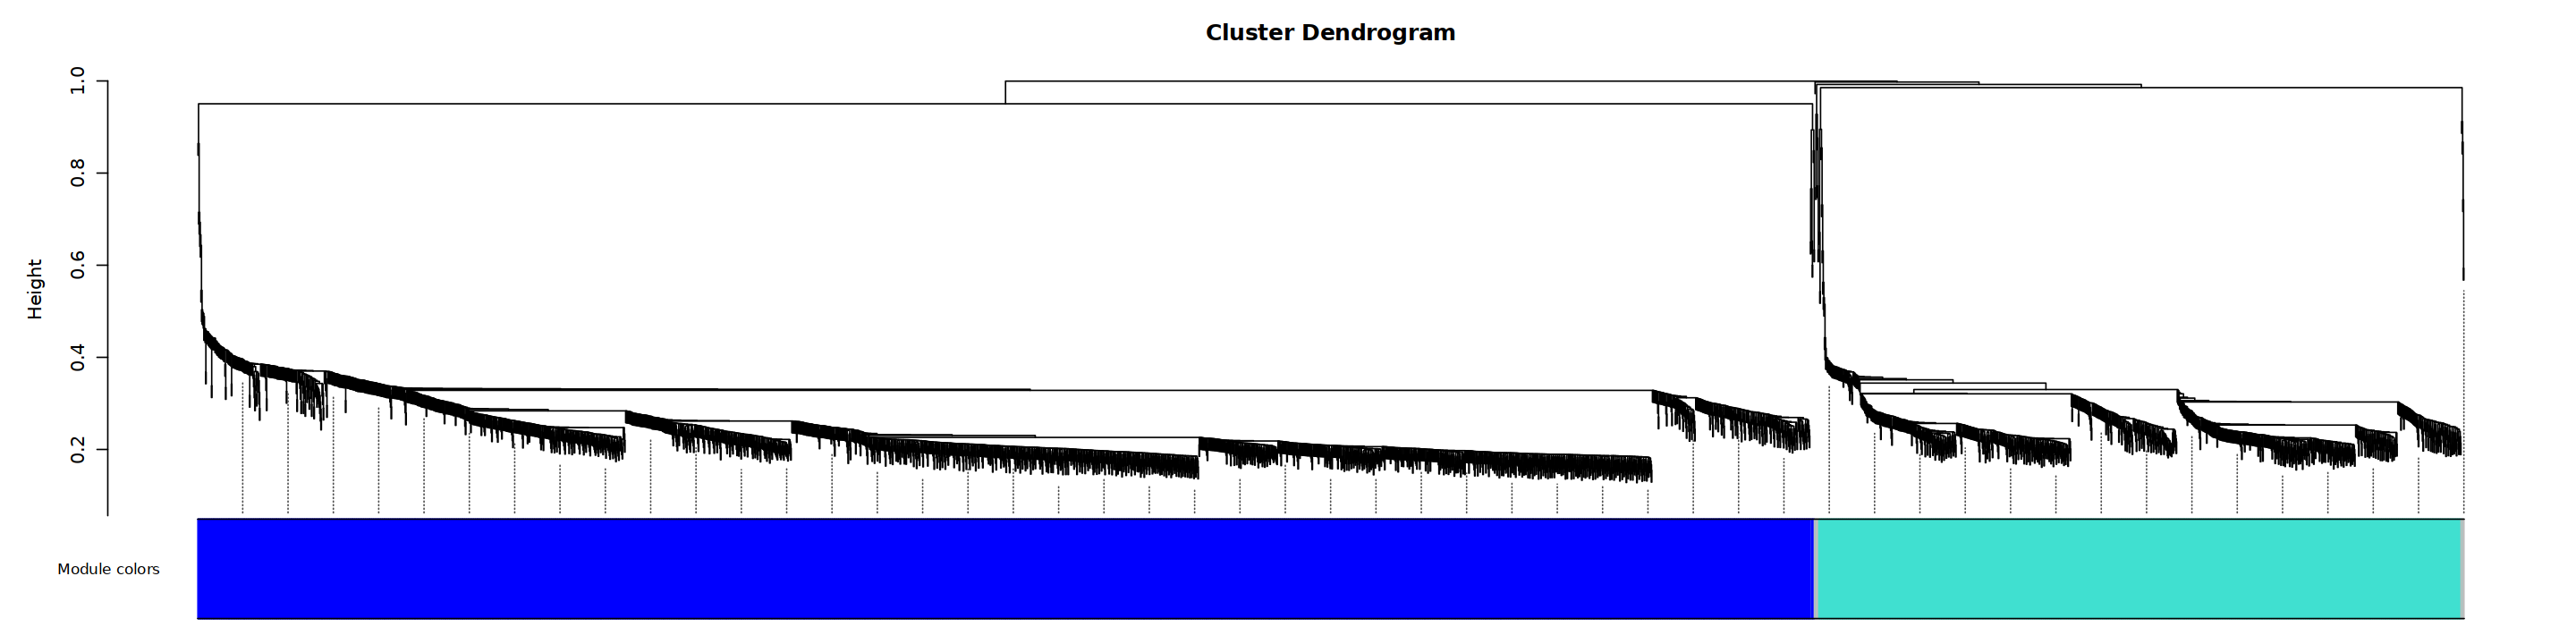

In [75]:
options(repr.plot.width=24, repr.plot.height=6)
# Convert labels to colors for plotting
mergedColors = labels2colors(netwk$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(
  netwk$dendrograms[[1]],
  mergedColors[netwk$blockGenes[[1]]],
  "Module colors",
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05 )

In [76]:
head(netwk$colors[netwk$blockGenes[[1]]])

AT1G01070 AT1G01100 AT1G01110 AT1G01210 AT1G01220 AT1G01225 
        2         1         1         1         2         2

In [77]:
table(netwk$colors)


   0    1    2    3    4    5    6    7    8    9   10 
  13 6758 6649  818  715  687  503  384  304  291  264 

In [95]:
module_df <- data.frame(
  gene_id = names(netwk$colors),
  colors = labels2colors(netwk$colors)
)

In [96]:
module_df[1:5,]

gene_id   colors   
1 AT1G01010 turquoise
2 AT1G01020 red      
3 AT1G01030 turquoise
4 AT1G01040 turquoise
5 AT1G01050 blue

In [97]:
table(module_df$colors)


    black      blue     brown     green      grey   magenta      pink    purple 
      384      6649       818       687        13       291       304       264 
      red turquoise    yellow 
      503      6758       715 

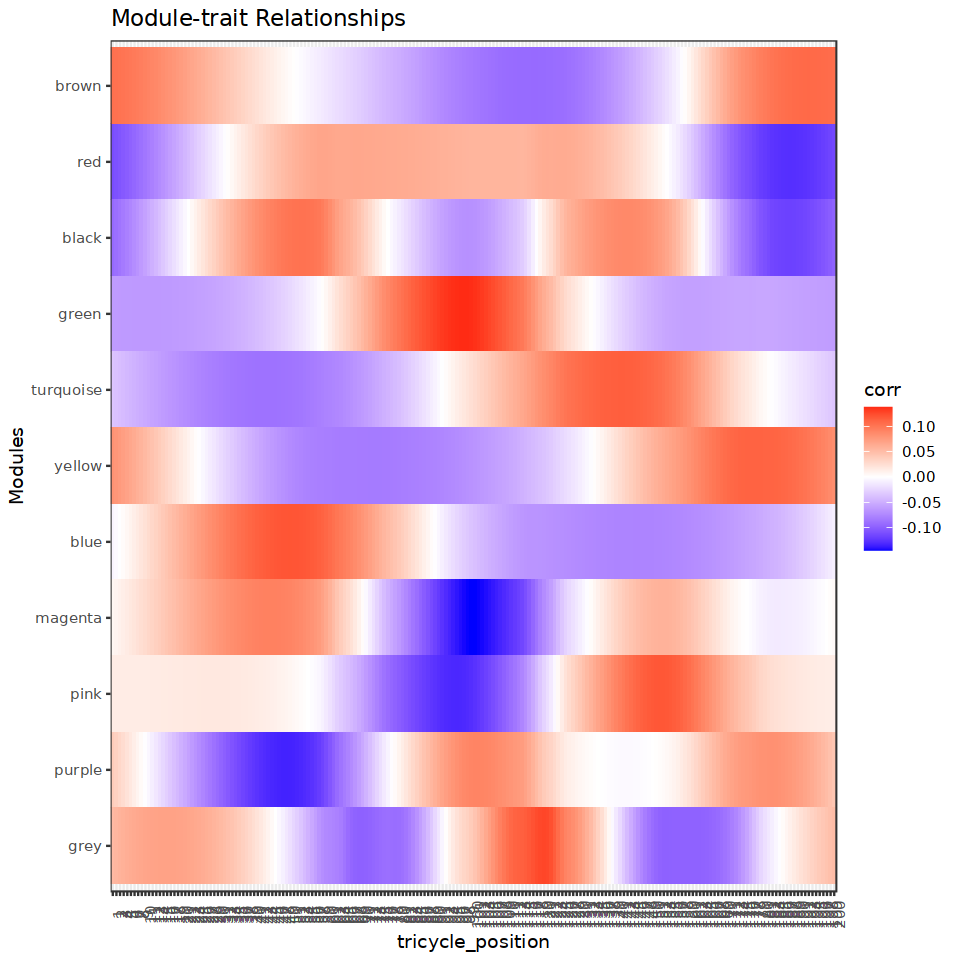

In [98]:
options(repr.plot.width=8, repr.plot.height=8)
# Get Module Eigengenes per cluster
MEs0 <- moduleEigengenes(y.list, mergedColors)$eigengenes

# Reorder modules so similar modules are next to each other
MEs0 <- orderMEs(MEs0)
module_order = names(MEs0) %>% gsub("ME","", .)

# Add treatment names
MEs0$treatment = row.names(MEs0)

# tidy & plot data
mME = MEs0 %>%
  pivot_longer(-treatment) %>%
  mutate(
    name = gsub("ME", "", name),
    name = factor(name, levels = module_order)
  )

#mME <- mME[-which(mME$name == "grey"),] 
mME$treatment <- factor(mME$treatment, levels = seq(1,200))
mME$tricycle_position <- mME$treatment
#mME$name <- factor(mME$name, levels = rev(c("green", "grey", "black", "blue", "brown", "turquoise", "yellow", "red", "pink", "magenta")))
mME$name <- factor(mME$name, levels = rev(c("brown", "red", "black", "green", "turquoise", "yellow", "blue", "magenta", "pink","purple","grey")))
mME$module <- as.character(mME$name)
#mME$module[which(mME$module=="green")]="G1-M1"
#mME$module[which(mME$module=="grey")]="G1-M2"
#mME$module[which(mME$module=="blue")]="G1-M3"
#mME$module[which(mME$module=="black")]="G1-M4"
#mME$module[which(mME$module=="brown")]="G1S-M5"
#mME$module[which(mME$module=="turquoise")]="G1S-M6"
#mME$module[which(mME$module=="yellow")]="S-M7"
#mME$module[which(mME$module=="magenta")]="G2M-M8"
#mME$module[which(mME$module=="red")]="G2MG1-M9"
#mME$module[which(mME$module=="pink")]="G1S-M10"
#mME$module[which(mME$module=="grey")]="Unassigned"
#mME$module <- factor(mME$module, levels = rev(c("G1-M1", "G1-M2", "G1-M3", "G1-M4", "G1S-M5", "G1S-M6", "S-M7", "G2M-M8", "G2MG1-M9", "G1S-M10", "Unassigned")))

mME %>% ggplot(., aes(x=tricycle_position, y=name, fill=value)) +
  geom_tile() +
  theme_bw() +
  scale_fill_gradient2(
    low = "blue",
    high = "red",
    mid = "white",
    midpoint = 0,
  #  limit = c(-1,1)
  ) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(title = "Module-trait Relationships", y = "Modules", fill="corr")

## Module GO

In [99]:
## Prepare gene module list
module_sel <- select(module_df, gene_id, colors)
module_list <- split(module_sel, f=module_sel$colors)
#this makes list from long df of gene lists - TARGET is what we want to keep
module_list  <- lapply(module_list, function(x) x[names(x)=="gene_id"])
# convert each sublist into character and eliminate duplicates
module_list  <- lapply(module_list, function(x) as.character(unique(x$gene_id)))

In [100]:
cluster_GO <- gost(module_list, organism = "athaliana", correction_method = "fdr", significant = F, multi_query = F)

cluster_GO_df <- cluster_GO[[1]]

cluster_GO_sig <- filter(cluster_GO_df, p_value<=0.01)

# top  terms for each cluster

cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=4) %>%
  group_by(query) %>%
  top_n(5, wt = -p_value) %>%
  arrange(desc(p_value)) -> top_GO

GO_n <- cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=4) %>%
  group_by(term_id) %>%
  tally() %>%
  arrange(desc(n))


GO_n <- dplyr::rename(GO_n, "n_clusters"=n)

cluster_GO_sig_n <- left_join(cluster_GO_sig, GO_n)

# get all terms for the top ones so that all clusters have values

top_GO_all <- filter(cluster_GO_df, term_id %in% top_GO$term_id)


#spread and plot


top_GO_sel <- select(top_GO_all, query, p_value, term_id, term_name)

spread_GO <- spread(top_GO_sel, key = query, p_value)

spread_GO[is.na(spread_GO)] <- 1

spread_GO_m <- as.matrix(-log10(spread_GO[3:ncol(spread_GO)]))
rownames(spread_GO_m) <- spread_GO$term_name

Joining with `by = join_by(term_id)`


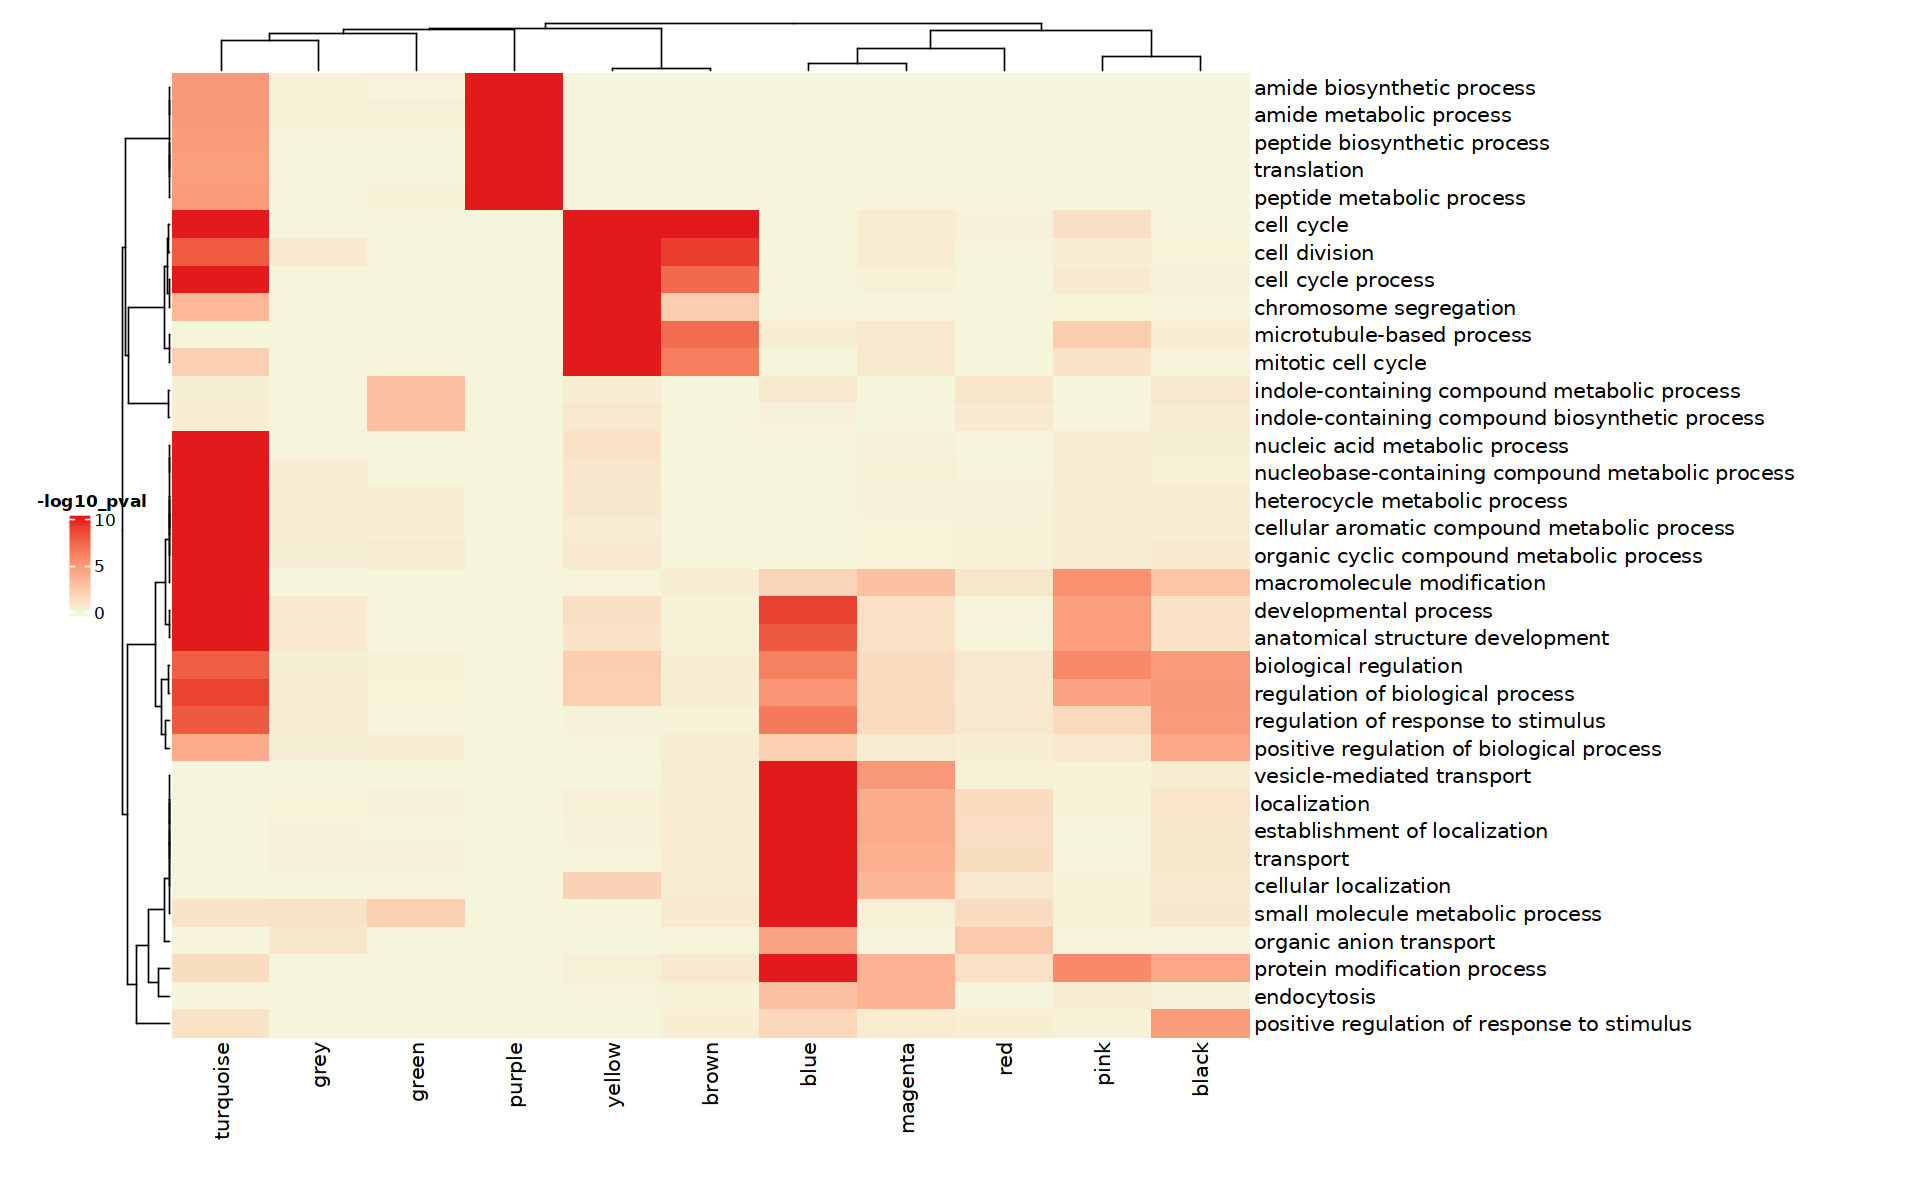

In [101]:
options(repr.plot.width = 16, repr.plot.height = 10)

GO_hm <- Heatmap(spread_GO_m, 
                 name = "-log10_pval", 
                 heatmap_legend_param = list(title_position="topcenter", color_bar = "continuous"), 
                 col = colorRamp2(c(0, 10), 
                                  c("beige", "#e31a1c")), 
                 cluster_rows = T,
                 cluster_columns = T, 
                 use_raster= FALSE, 
                 show_column_names = TRUE, 
                 show_row_names = TRUE, 
                 show_row_dend = TRUE, 
                 show_column_dend = TRUE, 
                 clustering_distance_rows = "pearson",
                 clustering_distance_columns = "pearson", 
                 row_names_gp = gpar(fontsize = 12)) 


# padding - bottom, left, top, right
draw(GO_hm, padding = unit(c(15, 15, 5, 80), "mm"), heatmap_legend_side = "left")

## Remove grey

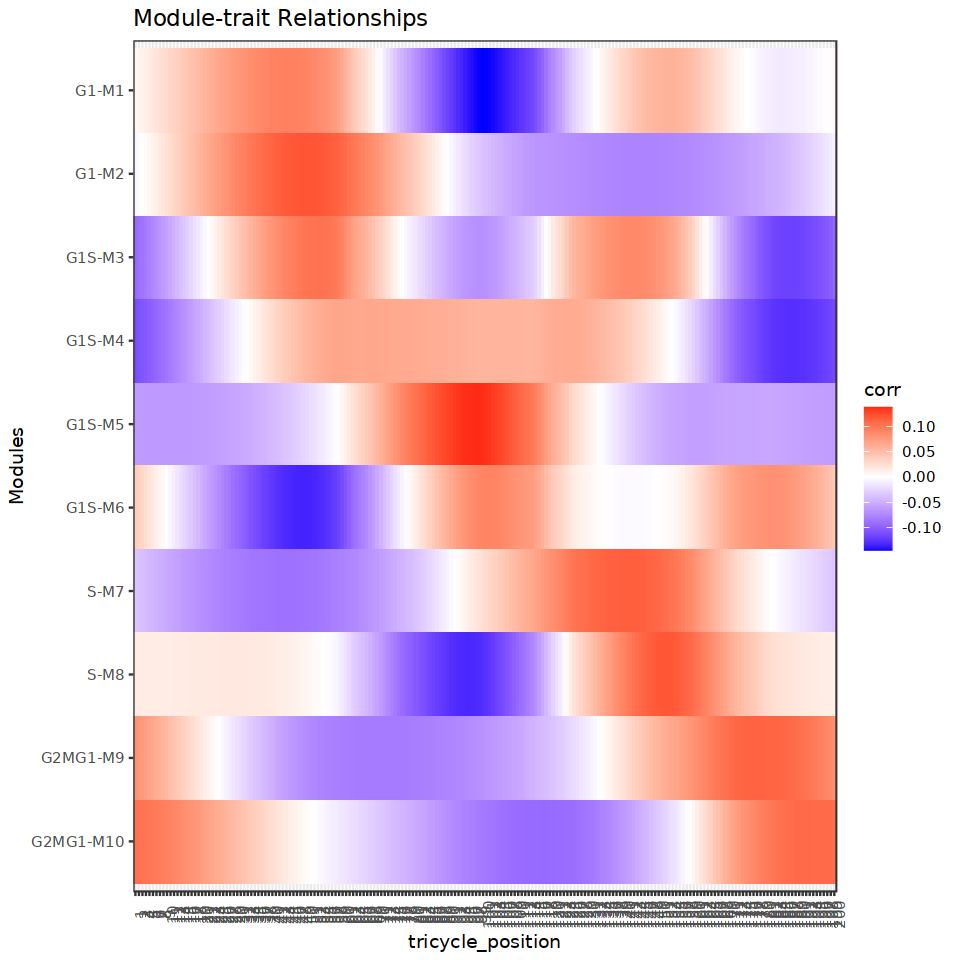

In [102]:
options(repr.plot.width=8, repr.plot.height=8)
# Get Module Eigengenes per cluster
MEs0 <- moduleEigengenes(y.list, mergedColors)$eigengenes

# Reorder modules so similar modules are next to each other
MEs0 <- orderMEs(MEs0)
module_order = names(MEs0) %>% gsub("ME","", .)

# Add treatment names
MEs0$treatment = row.names(MEs0)

# tidy & plot data
mME = MEs0 %>%
  pivot_longer(-treatment) %>%
  mutate(
    name = gsub("ME", "", name),
    name = factor(name, levels = module_order)
  )


mME <- mME[-which(mME$name == "grey"),] 
mME$treatment <- factor(mME$treatment, levels = seq(1,200))
mME$tricycle_position <- mME$treatment
#mME$name <- factor(mME$name, levels = rev(c("green", "grey", "black", "blue", "brown", "turquoise", "yellow", "red", "pink", "magenta")))
mME$name <- factor(mME$name, levels = rev(c("magenta", "blue", "black", "red", "green","purple", "turquoise", "pink", "yellow", "brown")))
mME$module <- as.character(mME$name)
mME$module[which(mME$module=="magenta")]="G1-M1"
mME$module[which(mME$module=="blue")]="G1-M2"
mME$module[which(mME$module=="black")]="G1S-M3"
mME$module[which(mME$module=="red")]="G1S-M4"
mME$module[which(mME$module=="green")]="G1S-M5"
mME$module[which(mME$module=="purple")]="G1S-M6"
mME$module[which(mME$module=="turquoise")]="S-M7"
mME$module[which(mME$module=="pink")]="S-M8"
mME$module[which(mME$module=="yellow")]="G2MG1-M9"
mME$module[which(mME$module=="brown")]="G2MG1-M10"
mME$module <- factor(mME$module, levels = rev(c("G1-M1", "G1-M2", "G1S-M3", "G1S-M4", "G1S-M5", "G1S-M6", "S-M7", "S-M8", "G2MG1-M9", "G2MG1-M10")))

mME %>% ggplot(., aes(x=tricycle_position, y=module, fill=value)) +
  geom_tile() +
  theme_bw() +
  scale_fill_gradient2(
    low = "blue",
    high = "red",
    mid = "white",
    midpoint = 0,
  #  limit = c(-1,1)
  ) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(title = "Module-trait Relationships", y = "Modules", fill="corr")

In [103]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_Gene_Module_Plot_CC.pdf",width=8, height=8)
print(mME %>% ggplot(., aes(x=tricycle_position, y=module, fill=value)) +
  geom_tile() +
  theme_bw() +
  scale_fill_gradient2(
    low = "blue",
    high = "red",
    mid = "white",
    midpoint = 0,
  #  limit = c(-1,1)
  ) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(title = "Module-trait Relationships", y = "Modules", fill="corr"))
dev.off()

png 
  2

In [104]:
head(MEs0)

MEgreen     MEred       MEblack     MEblue        MEpurple   MEturquoise
1 -0.06292724 -0.11280193 -0.09476705 -0.0070958259 0.03907418 -0.03679146
2 -0.06319146 -0.11042494 -0.09141089 -0.0038713676 0.03500705 -0.03881049
3 -0.06343191 -0.10791123 -0.08787816 -0.0005945044 0.03082476 -0.04081087
4 -0.06364731 -0.10526671 -0.08417839  0.0027297818 0.02653601 -0.04279118
5 -0.06383638 -0.10249730 -0.08032112  0.0060965092 0.02214945 -0.04475002
6 -0.06399781 -0.09960891 -0.07631589  0.0095006959 0.01767377 -0.04668598
  MEmagenta   MEpink     MEbrown    MEyellow   MEgrey     treatment
1 0.006469531 0.01471272 0.10465104 0.08181743 0.05303403 1        
2 0.008594824 0.01457642 0.10378887 0.07897368 0.05530398 2        
3 0.010797454 0.01448043 0.10282742 0.07603997 0.05741647 3        
4 0.013071424 0.01442213 0.10176978 0.07302121 0.05937155 4        
5 0.015410743 0.01439888 0.10061909 0.06992227 0.06116928 5        
6 0.017809415 0.01440806 0.09937845 0.06674806 0.06280971 6

In [105]:
module_df$colors <- factor(module_df$colors, levels=c("magenta", "blue", "black", "red", "green","purple", "turquoise", "pink", "yellow", "brown"))
table(module_df$colors)


  magenta      blue     black       red     green    purple turquoise      pink 
      291      6649       384       503       687       264      6758       304 
   yellow     brown 
      715       818 

In [106]:
module_df$module <- as.character(module_df$colors)
module_df$module[which(module_df$module=="magenta")]="G1-M1"
module_df$module[which(module_df$module=="blue")]="G1-M2"
module_df$module[which(module_df$module=="black")]="G1S-M3"
module_df$module[which(module_df$module=="red")]="G1S-M4"
module_df$module[which(module_df$module=="green")]="G1S-M5"
module_df$module[which(module_df$module=="purple")]="G1S-M6"
module_df$module[which(module_df$module=="turquoise")]="S-M7"
module_df$module[which(module_df$module=="pink")]="S-M8"
module_df$module[which(module_df$module=="yellow")]="G2MG1-M9"
module_df$module[which(module_df$module=="brown")]="G2MG1-M10"

module_df$module <- factor(module_df$module, levels = c("G1-M1", "G1-M2", "G1S-M3", "G1S-M4", "G1S-M5", "G1S-M6", "S-M7", "S-M8", "G2MG1-M9", "G2MG1-M10"))

table(module_df$module)



    G1-M1     G1-M2    G1S-M3    G1S-M4    G1S-M5    G1S-M6      S-M7      S-M8 
      291      6649       384       503       687       264      6758       304 
 G2MG1-M9 G2MG1-M10 
      715       818 

In [107]:
module_df$BES_up <- rep("No",nrow(module_df))
module_df$BES_up[match(GL2up, module_df$gene_id)[!is.na(match(GL2up, module_df$gene_id))]]="Yes"
module_df$BES_down <- rep("No",nrow(module_df))
module_df$BES_down[match(GL2down, module_df$gene_id)[!is.na(match(GL2down, module_df$gene_id))]]="Yes"
module_df$MYB3R4 <- rep("No",nrow(module_df))
module_df$MYB3R4[match(GL3, module_df$gene_id)[!is.na(match(GL3, module_df$gene_id))]]="Yes"

In [108]:
## BES_up
round((table(module_df$module,module_df$BES_up)/as.numeric(table(module_df$module)))[,2]/sum((table(module_df$module,module_df$BES_up)/as.numeric(table(module_df$module)))[,2]),2)

G1-M1     G1-M2    G1S-M3    G1S-M4    G1S-M5    G1S-M6      S-M7      S-M8 
     0.05      0.19      0.07      0.10      0.11      0.06      0.06      0.11 
 G2MG1-M9 G2MG1-M10 
     0.10      0.17

In [109]:
table(module_df$module,module_df$BES_up)

           
              No  Yes
  G1-M1      286    5
  G1-M2     6230  419
  G1S-M3     375    9
  G1S-M4     486   17
  G1S-M5     661   26
  G1S-M6     259    5
  S-M7      6631  127
  S-M8       293   11
  G2MG1-M9   692   23
  G2MG1-M10  772   46

In [110]:
## BES_down
round((table(module_df$module,module_df$BES_down)/as.numeric(table(module_df$module)))[,2]/sum((table(module_df$module,module_df$BES_down)/as.numeric(table(module_df$module)))[,2]),2)

G1-M1     G1-M2    G1S-M3    G1S-M4    G1S-M5    G1S-M6      S-M7      S-M8 
     0.13      0.11      0.10      0.13      0.12      0.06      0.07      0.11 
 G2MG1-M9 G2MG1-M10 
     0.09      0.09

In [111]:
table(module_df$module,module_df$BES_down)

           
              No  Yes
  G1-M1      274   17
  G1-M2     6323  326
  G1S-M3     366   18
  G1S-M4     472   31
  G1S-M5     650   37
  G1S-M6     257    7
  S-M7      6527  231
  S-M8       289   15
  G2MG1-M9   685   30
  G2MG1-M10  785   33

In [112]:
## MYB3R4
round((table(module_df$module,module_df$MYB3R4)/as.numeric(table(module_df$module)))[,2]/sum((table(module_df$module,module_df$MYB3R4)/as.numeric(table(module_df$module)))[,2]),2)

G1-M1     G1-M2    G1S-M3    G1S-M4    G1S-M5    G1S-M6      S-M7      S-M8 
     0.05      0.04      0.00      0.01      0.00      0.00      0.03      0.02 
 G2MG1-M9 G2MG1-M10 
     0.15      0.69

In [113]:
table(module_df$module,module_df$MYB3R4)

           
              No  Yes
  G1-M1      289    2
  G1-M2     6616   33
  G1S-M3     384    0
  G1S-M4     502    1
  G1S-M5     687    0
  G1S-M6     264    0
  S-M7      6734   24
  S-M8       303    1
  G2MG1-M9   700   15
  G2MG1-M10  741   77

In [114]:
write.csv(module_df, "./tradeseq/All_genes_Phloem_Atlas_tricycle_module.csv")

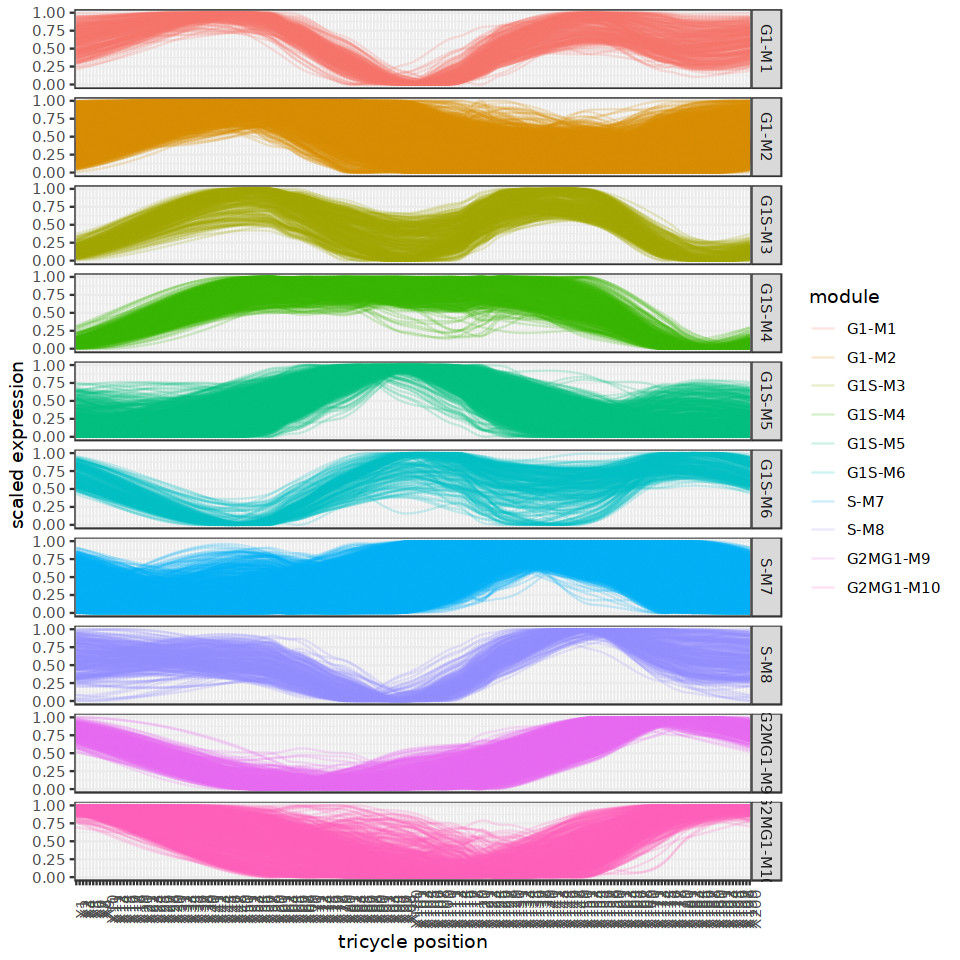

In [115]:
# pick out a few modules of interest here
modules_of_interest = c("G1-M1", "G1-M2", "G1S-M3", "G1S-M4", "G1S-M5", "G1S-M6", "S-M7", "S-M8", "G2MG1-M9", "G2MG1-M10")

# Pull out list of genes in that module
submod = module_df %>%
  subset(module %in% modules_of_interest)

row.names(module_df) = module_df$gene_id

# Get normalized expression for those genes
expr_normalized <- t(apply(y.list,2, function(x){(x-min(x))/(max(x)-min(x))}))

subexpr = expr_normalized[submod$gene_id,]

submod_df = data.frame(subexpr) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  pivot_longer(-gene_id) %>%
  mutate(
    module = module_df[gene_id,]$module
  )

submod_df$name <- factor(submod_df$name, levels = paste0("X",seq(1,200)))
submod_df$module <- factor(submod_df$module, levels =c("G1-M1", "G1-M2", "G1S-M3", "G1S-M4", "G1S-M5", "G1S-M6", "S-M7", "S-M8", "G2MG1-M9", "G2MG1-M10"))

submod_df %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "tricycle position",
       y = "scaled expression")

In [116]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_Gene_Module_Exp_Plot_CC.pdf",width=8, height=8)
print(submod_df %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "tricycle position",
       y = "scaled expression"))
dev.off()

png 
  2

## Module Membership

In [125]:
ME <- moduleEigengenes(y.list, mergedColors)$eigengenes

In [126]:
head(ME)

MEblack     MEblue        MEbrown    MEgreen     MEgrey     MEmagenta  
1 -0.09476705 -0.0070958259 0.10465104 -0.06292724 0.05303403 0.006469531
2 -0.09141089 -0.0038713676 0.10378887 -0.06319146 0.05530398 0.008594824
3 -0.08787816 -0.0005945044 0.10282742 -0.06343191 0.05741647 0.010797454
4 -0.08417839  0.0027297818 0.10176978 -0.06364731 0.05937155 0.013071424
5 -0.08032112  0.0060965092 0.10061909 -0.06383638 0.06116928 0.015410743
6 -0.07631589  0.0095006959 0.09937845 -0.06399781 0.06280971 0.017809415
  MEpink     MEpurple   MEred       MEturquoise MEyellow  
1 0.01471272 0.03907418 -0.11280193 -0.03679146 0.08181743
2 0.01457642 0.03500705 -0.11042494 -0.03881049 0.07897368
3 0.01448043 0.03082476 -0.10791123 -0.04081087 0.07603997
4 0.01442213 0.02653601 -0.10526671 -0.04279118 0.07302121
5 0.01439888 0.02214945 -0.10249730 -0.04475002 0.06992227
6 0.01440806 0.01767377 -0.09960891 -0.04668598 0.06674806

In [127]:
ME <- ME[,c("MEmagenta", "MEblue", "MEblack", "MEred","MEgreen", "MEpurple", "MEturquoise", "MEpink", "MEyellow", "MEbrown")]

In [128]:
colnames(ME)[which(colnames(ME)=="magenta")]="G1-M1"
colnames(ME)[which(colnames(ME)=="blue")]="G1-M2"
colnames(ME)[which(colnames(ME)=="black")]="G1S-M3"
colnames(ME)[which(colnames(ME)=="red")]="G1S-M4"
colnames(ME)[which(colnames(ME)=="green")]="G1S-M5"
colnames(ME)[which(colnames(ME)=="purple")]="G1S-M6"
colnames(ME)[which(colnames(ME)=="turquoise")]="S-M7"
colnames(ME)[which(colnames(ME)=="pink")]="S-M8"
colnames(ME)[which(colnames(ME)=="yellow")]="G2MG1-M9"
colnames(ME)[which(colnames(ME)=="brown")]="G2MG1-M10"

In [129]:
head(ME)

MEmagenta   MEblue        MEblack     MEred       MEgreen     MEpurple  
1 0.006469531 -0.0070958259 -0.09476705 -0.11280193 -0.06292724 0.03907418
2 0.008594824 -0.0038713676 -0.09141089 -0.11042494 -0.06319146 0.03500705
3 0.010797454 -0.0005945044 -0.08787816 -0.10791123 -0.06343191 0.03082476
4 0.013071424  0.0027297818 -0.08417839 -0.10526671 -0.06364731 0.02653601
5 0.015410743  0.0060965092 -0.08032112 -0.10249730 -0.06383638 0.02214945
6 0.017809415  0.0095006959 -0.07631589 -0.09960891 -0.06399781 0.01767377
  MEturquoise MEpink     MEyellow   MEbrown   
1 -0.03679146 0.01471272 0.08181743 0.10465104
2 -0.03881049 0.01457642 0.07897368 0.10378887
3 -0.04081087 0.01448043 0.07603997 0.10282742
4 -0.04279118 0.01442213 0.07302121 0.10176978
5 -0.04475002 0.01439888 0.06992227 0.10061909
6 -0.04668598 0.01440806 0.06674806 0.09937845

In [130]:
datKME = signedKME(y.list[,module_df$gene_id[which(module_df$module != "Unassigned")]], ME, outputColumnName = "kME")

In [131]:
colnames(datKME) <- paste0("kME_",c("G1-M1", "G1-M2", "G1S-M3", "G1S-M4", "G1S-M5", "G1S-M6", "S-M7", "S-M8", "G2MG1-M9", "G2MG1-M10"))

In [132]:
head(datKME)

kME_G1-M1   kME_G1-M2   kME_G1S-M3  kME_G1S-M4  kME_G1S-M5
AT1G01010 -0.47635424 -0.82896438  0.12114626  0.36334674  0.3858923
AT1G01020 -0.46743291  0.03862948  0.45900966  0.96528162  0.8442728
AT1G01030 -0.00883007 -0.84503027 -0.37749861 -0.63440726 -0.4577792
AT1G01040 -0.13993421 -0.19381788  0.71774431  0.85715816  0.4612264
AT1G01050  0.38247055  0.95869905  0.07054638 -0.02776636 -0.1258440
AT1G01060 -0.37395407 -0.66413160  0.34985813  0.55427039  0.4150461
          kME_G1S-M6  kME_S-M7   kME_S-M8    kME_G2MG1-M9 kME_G2MG1-M10
AT1G01010  0.54098776  0.9592199  0.09904726  0.0367631   -0.7066345   
AT1G01020 -0.08192871  0.2245726 -0.54946464 -0.8431030   -0.9562942   
AT1G01030  0.63722195  0.6936058  0.63137073  0.8968953    0.2902137   
AT1G01040 -0.16769257  0.5411004 -0.02071880 -0.5418415   -0.9031343   
AT1G01050 -0.66810288 -0.9936319 -0.30285984 -0.3706164    0.4249815   
AT1G01060  0.31508079  0.8824949  0.08371773 -0.1560908   -0.8163872

In [133]:
write.csv(left_join(rownames_to_column(datKME), rownames_to_column(module_df), by=c("rowname")), "./tradeseq/All_genes_Phloem_Atlas_tricycle_module_membership.csv")

## Export Networks (Did not run, just for ref)

In [140]:
genes_of_interest = module_df %>%
  subset(module %in% modules_of_interest[-11])

expr_of_interest = t(y.list)[genes_of_interest$gene_id,]
expr_of_interest[1:5,1:5]
#>                       B-3      B-4      B-5      L-3      L-4
#> AC186512.3_FG001 6.901539 7.389644 6.975945 6.859593 7.370816
#> AC186512.3_FG007 7.919688 7.754506 7.670946 7.417760 7.988427
#> AC190623.3_FG001 6.575155 7.170788 7.438024 8.223261 8.008850
#> AC196475.3_FG004 6.054319 6.439899 6.424540 5.815344 6.565299
#> AC196475.3_FG005 6.194406 5.872273 6.207174 6.499828 6.314952

# Only recalculate TOM for modules of interest (faster, altho there's some online discussion if this will be slightly off)
TOM = TOMsimilarityFromExpr(t(expr_of_interest),
                            power = picked_power)
#> TOM calculation: adjacency..
#> ..will use 4 parallel threads.
#>  Fraction of slow calculations: 0.000000
#> ..connectivity..
#> ..matrix multiplication (system BLAS)..
#> ..normalization..
#> ..done.

# Add gene names to row and columns
row.names(TOM) = row.names(expr_of_interest)
colnames(TOM) = row.names(expr_of_interest)

[,1]       [,2]       [,3]       [,4]       [,5]      
AT1G01010 0.03437418 0.03445125 0.03452833 0.03460526 0.03468185
AT1G01020 0.16125047 0.15936069 0.15746179 0.15555653 0.15364767
AT1G01030 0.01163936 0.01141413 0.01118563 0.01095425 0.01072038
AT1G01040 0.02817155 0.02762631 0.02707317 0.02651315 0.02594726
AT1G01050 1.13815937 1.14230433 1.14652946 1.15082737 1.15519066

TOM calculation: adjacency..
..will use 94 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [141]:
edge_list = data.frame(TOM) %>%
  mutate(
    gene1 = row.names(.)
  ) %>%
  pivot_longer(-gene1) %>%
  dplyr::rename(gene2 = name, correlation = value) %>%
  unique() %>%
  subset(!(gene1==gene2)) %>%
  mutate(
    module1 = module_df[gene1,]$module,
    module2 = module_df[gene2,]$module
  )

head(edge_list)
#> # A tibble: 6 x 5
#>   gene1            gene2            correlation module1   module2  
#>   <chr>            <chr>                  <dbl> <chr>     <chr>    
#> 1 AC186512.3_FG001 AC186512.3_FG007      0.0238 turquoise turquoise
#> 2 AC186512.3_FG001 AC190623.3_FG001      0.0719 turquoise turquoise
#> 3 AC186512.3_FG001 AC196475.3_FG004      0.143  turquoise turquoise
#> 4 AC186512.3_FG001 AC196475.3_FG005      0.0117 turquoise turquoise
#> 5 AC186512.3_FG001 AC196489.3_FG002      0.0181 turquoise turquoise
#> 6 AC186512.3_FG001 AC198481.3_FG004      0.0240 turquoise turquoise

# Export Network file to be read into Cytoscape, VisANT, etc
write_delim(edge_list,
            file = "./tradeseq/Module_network_edgelist.tsv",
            delim = "\t")

gene1     gene2     correlation  module1  module2
1 AT1G01010 AT1G01020 1.263899e-05 G2MG1-M9 S-M7   
2 AT1G01010 AT1G01030 1.360577e-05 G2MG1-M9 S-M7   
3 AT1G01010 AT1G01040 1.104410e-06 G2MG1-M9 S-M7   
4 AT1G01010 AT1G01050 6.631369e-05 G2MG1-M9 G1-M2  
5 AT1G01010 AT1G01060 7.753520e-04 G2MG1-M9 S-M7   
6 AT1G01010 AT1G01070 3.555517e-08 G2MG1-M9 S-M7

In [142]:
## 30G too large
nrow(edge_list)

[1] 589639806

In [143]:
summary(edge_list$correlation)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000138 0.0056340 0.0982158 0.1385098 0.6644113 

In [157]:
edge_list_cor04 <- edge_list %>% filter(correlation>=0.4)

In [158]:
## 2.6G acceptable
nrow(edge_list_cor04)

[1] 52641560

In [159]:
write_delim(edge_list_cor04,
            file = "./tradeseq/Module_network_edgelist_cor04.tsv",
            delim = "\t")

In [160]:
head(edge_list_cor04)

gene1     gene2     correlation module1 module2
1 AT1G01020 AT1G01090 0.4742238   S-M7    S-M7   
2 AT1G01020 AT1G01130 0.4721234   S-M7    S-M7   
3 AT1G01020 AT1G01260 0.4529889   S-M7    S-M7   
4 AT1G01020 AT1G01290 0.5408273   S-M7    S-M7   
5 AT1G01020 AT1G01370 0.4995471   S-M7    S-M7   
6 AT1G01020 AT1G01480 0.4947831   S-M7    S-M7

In [161]:
table(edge_list_cor04$module1)


     G1-M1      G1-M2      G1-M3      G1-M4     G1S-M5     G1S-M6       S-M7 
     60171    8334861     179501       4033    1002022      49934   40704082 
    G2M-M8   G2MG1-M9    G1S-M10 Unassigned 
   2295271      11613         72          0 

In [162]:
table(edge_list_cor04$module2)


     G1-M1      G1-M2      G1-M3      G1-M4     G1S-M5     G1S-M6       S-M7 
     60171    8334861     179501       4033    1002022      49934   40704082 
    G2M-M8   G2MG1-M9    G1S-M10 Unassigned 
   2295271      11613         72          0 

## GeneOverlap
## Modules vs. signal interested

In [26]:
module_df <- read.csv("./tradeseq/All_genes_Phloem_Atlas_tricycle_module.csv", row.names=1)

In [27]:
head(module_df)

gene_id   colors    module BES_up BES_down MYB3R4
1 AT1G01010 turquoise S-M7   No     No       No    
2 AT1G01020 red       G1S-M4 No     No       No    
3 AT1G01030 turquoise S-M7   No     No       No    
4 AT1G01040 turquoise S-M7   No     No       No    
5 AT1G01050 blue      G1-M2  No     No       No    
6 AT1G01060 turquoise S-M7   No     No       No

In [28]:
## Prepare gene module list
module_sel <- select(module_df, gene_id, module)
module_list <- split(module_sel, f=module_sel$module)
#this makes list from long df of gene lists - TARGET is what we want to keep
module_list  <- lapply(module_list, function(x) x[names(x)=="gene_id"])
# convert each sublist into character and eliminate duplicates
module_list  <- lapply(module_list, function(x) as.character(unique(x$gene_id)))

In [29]:
module_list <- module_list[c("G1-M1", "G1-M2", "G1S-M3", "G1S-M4", "G1S-M5", "G1S-M6", "S-M7", "S-M8", "G2MG1-M9", "G2MG1-M10")]

In [30]:
## Prepare gene lists to intersect with module
BES_up <- module_df$gene_id[which(module_df$BES_up=="Yes")]
BES_down <- module_df$gene_id[which(module_df$BES_down=="Yes")]
MYB3R4 <- module_df$gene_id[which(module_df$MYB3R4=="Yes")]
g_list <- list("BES_up"=BES_up, "BES_down"=BES_down, "MYB3R4"=MYB3R4)

In [31]:
nrow(module_df)

[1] 17386

In [32]:
## GeneOverlap 

# number of integrated features

genome_size <- 17386L

#compare all lists
gom.self <- newGOM(module_list, g_list, genome.size=genome_size)

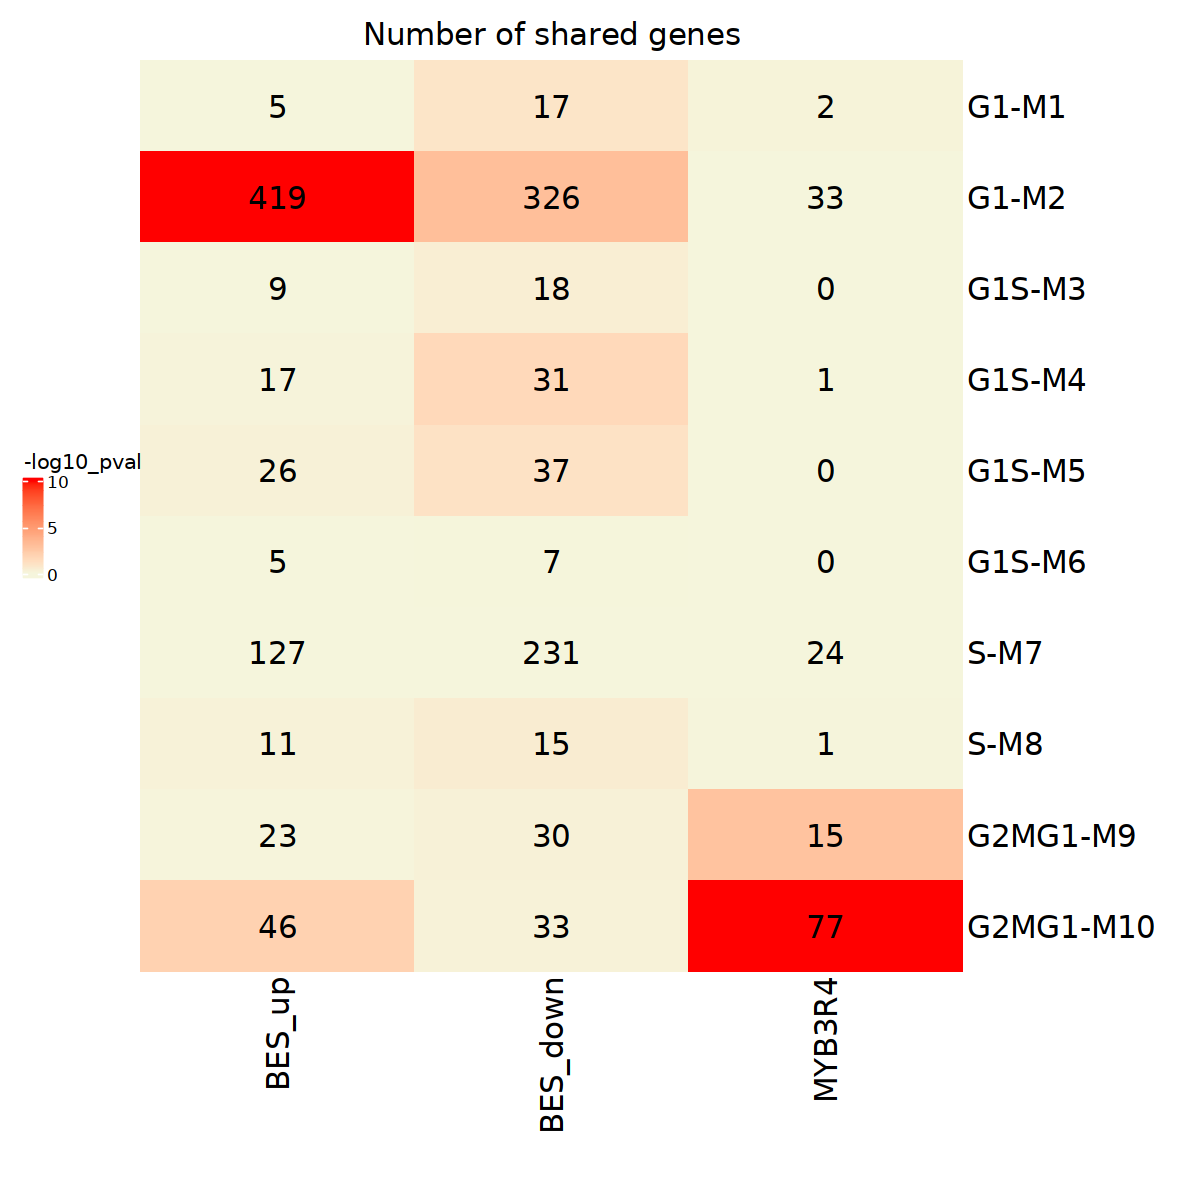

In [33]:
options(repr.plot.width = 10, repr.plot.height = 10)
 
int <- getNestedList(gom.self, "intersection")
int_matrix <- getMatrix(gom.self, "intersection")
p.val <- getMatrix(gom.self, "pval")
JC <- getMatrix(gom.self, "Jaccard")

# log of p.val for intersection
p.val_log <- -log10(p.val + 1e-200)


olap <- Heatmap(p.val_log, 
                name = "-log10_pval", 
                col = colorRamp2(c(0, 10), 
                                 c("beige", "red")), 
                column_title = "Number of shared genes", 
                cluster_rows = F,
                cluster_columns = F, 
                use_raster= FALSE, 
                show_column_names = TRUE, 
                show_row_names = TRUE, 
                show_row_dend = TRUE,
                heatmap_legend_param = list(title_gp = grid::gpar(fontsize = 12)),
                column_title_gp = grid::gpar(fontsize = 18),
                column_names_gp = grid::gpar(fontsize = 18),
                row_names_gp = grid::gpar(fontsize = 18),
                clustering_distance_rows = "pearson",
                clustering_distance_columns = "pearson", 
                show_column_dend = TRUE, cell_fun = function(j, i, x, y, width, height, fill) {grid.text(sprintf("%.0f", int_matrix[i, j]), x, y, gp = gpar(fontsize = 18))
})
                        
                        # padding - bottom, left, top, right
draw(olap, padding = unit(c(15, 5, 5, 10), "mm"), heatmap_legend_side = "left")
     

In [34]:
summary(as.numeric(as.matrix(p.val_log)))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.00416  0.12161  3.57974  0.80739 60.30735 

In [144]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_Gene_Module_Intersection_With_GeneList.pdf",width=10, height=10)
draw(olap, padding = unit(c(15, 5, 5, 10), "mm"), heatmap_legend_side = "left")
dev.off()

png 
  2

## Check signals (z-score) in the proliferation domain Protophloem

In [35]:
bsn <- read.csv("./tradeseq/BR_bsn_genes.csv")

In [36]:
head(bsn)

Name     AGI       
1 DWF4     AT3G50660 
2 CPD      AT5G05690 
3 DET2     AT2G38050 
4 ROT3     AT4G36380 
5 CYP90D1  AT3G13730 
6 BR6OX1   AT5G38970

In [37]:
length(module_df$gene_id)

[1] 17386

In [38]:
s1 <- intersect(module_list$`G1-M2`, g_list$BES_up)
#s1 <- g_list$BES_up
length(s1)
#s2 <- intersect(module_list$`G1-M2`, g_list$BES_down)
#s2 <- g_list$BES_down
s2 <- intersect(module_df$gene_id, bsn$AGI)
length(s2)

[1] 419

[1] 3

In [39]:
s1

[1] "AT1G01540" "AT1G02640" "AT1G03870" "AT1G04680" "AT1G05000" "AT1G05530"
  [7] "AT1G05805" "AT1G05870" "AT1G06850" "AT1G07240" "AT1G07410" "AT1G08500"
 [13] "AT1G08510" "AT1G08590" "AT1G09950" "AT1G10480" "AT1G11740" "AT1G12240"
 [19] "AT1G12500" "AT1G12710" "AT1G12850" "AT1G13250" "AT1G14290" "AT1G14685"
 [25] "AT1G15210" "AT1G15800" "AT1G16510" "AT1G18290" "AT1G19220" "AT1G19835"
 [31] "AT1G19840" "AT1G19870" "AT1G20010" "AT1G20190" "AT1G20823" "AT1G20840"
 [37] "AT1G21070" "AT1G21830" "AT1G21900" "AT1G22180" "AT1G22330" "AT1G22460"
 [43] "AT1G22530" "AT1G22640" "AT1G22910" "AT1G23030" "AT1G24170" "AT1G25230"
 [49] "AT1G25400" "AT1G25425" "AT1G27200" "AT1G27930" "AT1G28280" "AT1G29060"
 [55] "AT1G29280" "AT1G29640" "AT1G32090" "AT1G32170" "AT1G32700" "AT1G33230"
 [61] "AT1G33240" "AT1G36060" "AT1G49500" "AT1G50430" "AT1G51950" "AT1G52750"
 [67] "AT1G55360" "AT1G56590" "AT1G61100" "AT1G61740" "AT1G63000" "AT1G63430"
 [73] "AT1G64650" "AT1G64700" "AT1G65295" "AT1G65840" "AT1G66150" "AT1G68490"
 [79] "AT1G68670" "AT1G68840" "AT1G69030" "AT1G69690" "AT1G69780" "AT1G70370"
 [85] "AT1G70900" "AT1G70940" "AT1G70950" "AT1G71880" "AT1G71970" "AT1G72150"
 [91] "AT1G72160" "AT1G72300" "AT1G72430" "AT1G72510" "AT1G72690" "AT1G76160"
 [97] "AT1G76180" "AT1G76230" "AT1G76600" "AT1G76878" "AT1G77640" "AT1G77850"
[103] "AT1G78260" "AT1G78300" "AT1G78860" "AT2G01300" "AT2G01940" "AT2G02180"
[109] "AT2G02810" "AT2G04500" "AT2G12462" "AT2G16660" "AT2G17290" "AT2G17300"
[115] "AT2G18160" "AT2G18960" "AT2G19580" "AT2G19660" "AT2G19800" "AT2G19880"
[121] "AT2G20562" "AT2G20670" "AT2G20780" "AT2G20840" "AT2G21520" "AT2G21880"
[127] "AT2G22125" "AT2G24300" "AT2G24765" "AT2G25430" "AT2G25490" "AT2G26730"
[133] "AT2G27770" "AT2G28200" "AT2G30230" "AT2G30930" "AT2G30990" "AT2G31010"
[139] "AT2G32140" "AT2G32430" "AT2G32580" "AT2G34770" "AT2G35880" "AT2G36310"
[145] "AT2G36320" "AT2G36410" "AT2G36830" "AT2G37678" "AT2G38120" "AT2G38310"
[151] "AT2G38480" "AT2G39130" "AT2G41110" "AT2G41640" "AT2G41810" "AT2G42320"
[157] "AT2G42380" "AT2G42570" "AT2G42580" "AT2G42870" "AT2G42880" "AT2G43340"
[163] "AT2G44740" "AT2G44940" "AT2G45070" "AT2G45180" "AT2G45200" "AT2G45670"
[169] "AT2G46710" "AT2G47070" "AT2G47440" "AT2G47485" "AT2G48030" "AT3G02170"
[175] "AT3G02460" "AT3G02570" "AT3G02580" "AT3G02750" "AT3G04730" "AT3G04910"
[181] "AT3G05165" "AT3G05800" "AT3G05890" "AT3G05910" "AT3G05936" "AT3G06060"
[187] "AT3G06070" "AT3G06750" "AT3G06890" "AT3G07010" "AT3G07460" "AT3G08670"
[193] "AT3G08680" "AT3G10980" "AT3G11130" "AT3G11150" "AT3G11590" "AT3G11700"
[199] "AT3G12560" "AT3G12610" "AT3G12710" "AT3G12830" "AT3G13310" "AT3G13320"
[205] "AT3G14310" "AT3G14370" "AT3G14840" "AT3G15350" "AT3G15540" "AT3G15810"
[211] "AT3G15820" "AT3G16180" "AT3G16850" "AT3G17120" "AT3G17430" "AT3G17580"
[217] "AT3G18000" "AT3G18690" "AT3G18780" "AT3G19030" "AT3G19680" "AT3G20640"
[223] "AT3G21700" "AT3G23690" "AT3G23750" "AT3G23820" "AT3G24550" "AT3G25700"
[229] "AT3G25730" "AT3G28180" "AT3G28910" "AT3G29370" "AT3G43430" "AT3G43800"
[235] "AT3G44260" "AT3G46280" "AT3G47210" "AT3G47220" "AT3G47820" "AT3G48360"
[241] "AT3G49350" "AT3G49360" "AT3G49630" "AT3G49940" "AT3G50350" "AT3G50530"
[247] "AT3G52290" "AT3G52460" "AT3G52470" "AT3G52500" "AT3G53370" "AT3G53600"
[253] "AT3G54000" "AT3G54030" "AT3G54400" "AT3G54770" "AT3G54810" "AT3G55960"
[259] "AT3G56000" "AT3G56800" "AT3G56810" "AT3G57420" "AT3G58120" "AT3G58130"
[265] "AT3G58620" "AT3G58850" "AT3G60320" "AT3G60540" "AT3G61820" "AT3G62150"
[271] "AT3G62390" "AT3G62570" "AT4G00710" "AT4G00740" "AT4G02130" "AT4G02540"
[277] "AT4G03190" "AT4G04745" "AT4G09890" "AT4G10380" "AT4G11280" "AT4G12420"
[283] "AT4G12730" "AT4G13340" "AT4G14750" "AT4G14980" "AT4G15800" "AT4G15920"
[289] "AT4G16380" "AT4G16660" "AT4G17870" "AT4G17900" "AT4G18380" "AT4G18670"
[295] "AT4G19120" "AT4G19160" "AT4G20170" "AT4G20300" "AT4G20870" "AT4G21960"
[301] "AT4G22820" "AT4G24230" "AT4G25280" "AT4G25360" "AT4G26690" "AT4G27270"
[307] "AT4G28720" "AT4G2

In [40]:
s2

[1] "AT3G13730" "AT3G50660" "AT5G05690"

In [41]:
save(s1,s2,file='./tradeseq/Phloem_Atlas_upper_lower_cells_gene_lists.rds')

In [42]:
ulgl <- list("Upper_cells"=s1, "Lower_cells"=s2)
# Find the maximum length
max_length <- max(lengths(ulgl))

# Fill with NA to make all equal length
ulgl_df <- data.frame(lapply(ulgl, function(x) c(x, rep(NA, max_length - length(x)))))


In [43]:
write.csv(ulgl_df, "./tradeseq/Phloem_Atlas_upper_lower_cells_gene_lists.csv")

In [44]:
rc.sub <- subset(rc.integrated, cells= colnames(rc.integrated)[which(rc.integrated$tricycleCCStage == "G1/G0")])
#rc.sub <- subset(rc.integrated, cells= colnames(rc.integrated)[which(rc.integrated$tricycleCCStage == "G1/G0" | rc.integrated$tricycleCCStage == "S")])

In [45]:
## 1177 G1 cells out of 410 cells
length(colnames(rc.integrated)[which(rc.integrated$tricycleCCStage == "G1/G0")])
## 1339 S cells
length(colnames(rc.integrated)[which(rc.integrated$tricycleCCStage == "S")])
## 1129 G2M cells
length(colnames(rc.integrated)[which(rc.integrated$tricycleCCStage == "G2M")])

[1] 1177

[1] 1339

[1] 1129

In [46]:
zscore <- function(x){(x-mean(x))/sd(x)}
s1z <- as.numeric(apply(apply(as.matrix(rc.sub@assays$RNA@data)[s1,], 1, zscore), 1, function(x){mean(x,na.rm = TRUE)}))
s2z <- as.numeric(apply(apply(as.matrix(rc.sub@assays$RNA@data)[s2,], 1, zscore), 1, function(x){mean(x,na.rm = TRUE)}))

In [47]:
summary(s1z)
summary(s2z)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.40912 -0.25354 -0.04296  0.00000  0.16660  0.96865 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3550 -0.3550 -0.2367  0.0000  0.1256  9.0612 

In [48]:
dat <- data.frame(cell_id=colnames(rc.sub), tricyclePosition=rc.sub$tricyclePosition, Signature1=s1z, Signature2=s2z)
dat <- dat %>% mutate(diff = abs(Signature1-Signature2))

In [49]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [50]:
dat$Signature1_scaled <- range01(dat$Signature1)
dat$Signature2_scaled <- range01(dat$Signature2)
dat$ratio <- dat$Signature1_scaled/dat$Signature2_scaled

In [51]:
head(dat)

cell_id                tricyclePosition Signature1 
APL_AAACCCACAGTTGAAA-1 APL_AAACCCACAGTTGAAA-1 0.5938682         0.36621714
APL_AAACCCATCTGCGAGC-1 APL_AAACCCATCTGCGAGC-1 0.6420312         0.28601250
APL_AAAGAACTCGAGAAGC-1 APL_AAAGAACTCGAGAAGC-1 0.6490424         0.13330378
APL_AAAGGTAGTCTGTGAT-1 APL_AAAGGTAGTCTGTGAT-1 0.7424053         0.11557090
APL_AAAGGTATCCTGTAGA-1 APL_AAAGGTATCCTGTAGA-1 0.6932624        -0.07080545
APL_AAAGTGAGTTTCCATT-1 APL_AAAGTGAGTTTCCATT-1 0.5952930        -0.08766026
                       Signature2  diff        Signature1_scaled
APL_AAACCCACAGTTGAAA-1 -0.35503442 0.721251552 0.5627465        
APL_AAACCCATCTGCGAGC-1  0.29078681 0.004774306 0.5045331        
APL_AAAGAACTCGAGAAGC-1 -0.35503442 0.488338194 0.3936955        
APL_AAAGGTAGTCTGTGAT-1  1.17950494 1.063934039 0.3808248        
APL_AAAGGTATCCTGTAGA-1 -0.07856377 0.007758317 0.2455509        
APL_AAAGTGAGTTTCCATT-1 -0.35503442 0.267374160 0.2333175        
                       Signature2_scaled ratio   
APL_AAACCCACAGTTGAAA-1 0.00000000             Inf
APL_AAACCCATCTGCGAGC-1 0.06858613        7.356197
APL_AAAGAACTCGAGAAGC-1 0.00000000             Inf
APL_AAAGGTAGTCTGTGAT-1 0.16296787        2.336809
APL_AAAGGTATCCTGTAGA-1 0.02936115        8.363123
APL_AAAGTGAGTTTCCATT-1 0.00000000             Inf

In [52]:
dat$inianno <- rep("Unassigned", length(rc.integrated))
dat$anno <- rep("Unassigned", length(rc.integrated))
#dat$anno[which((dat$Signature1 >0) & (dat$Signature1 > dat$Signature2))] = "S1"
#dat$anno[which((dat$Signature2 >0) & (dat$Signature2 > dat$Signature1))] = "S2"
dat$inianno[which((dat$Signature1 > dat$Signature2))] = "S1"
dat$inianno[which((dat$Signature2 > dat$Signature1))] = "S2"
dat$anno[(dat$inianno == "S1")][(order(dat$Signature1[which(dat$inianno == "S1")]) < nrow(dat)/10)] = "S1"
dat$anno[(dat$inianno == "S2")][(order(dat$Signature2[which(dat$inianno == "S2")]) < nrow(dat)/10)] = "S2"
#dat$anno[which((dat$Signature1 >0) & (dat$Signature1 > dat$Signature2))] = "S1"
#dat$anno[which((dat$Signature2 >0) & (dat$Signature2 > dat$Signature1))] = "S2"
#dat$anno[which((dat$Signature1 > dat$Signature2))] = "S1"
#dat$anno[which((dat$Signature2 > dat$Signature1))] = "S2"
#dat$anno[which((dat$Signature1 > dat$Signature2) & (dat$Signature1 > as.numeric(quantile(dat$Signature1, 0.9))))] = "S1"
#dat$anno[which((dat$Signature2 > dat$Signature1) & (dat$Signature2 > as.numeric(quantile(dat$Signature2, 0.9))))] = "S2"
#dat$anno[which((dat$Signature1 > as.numeric(quantile(dat$Signature1, 0.9))))] = "S1"
#dat$anno[which((dat$Signature2 > as.numeric(quantile(dat$Signature2, 0.9))))] = "S2"
#dat$anno[which((dat$Signature1 > as.numeric(quantile(dat$Signature1, 0.9))) & (dat$Signature2 > as.numeric(quantile(dat$Signature2, 0.9))))] = "Unassigned"

In [53]:
head(dat)

cell_id                tricyclePosition Signature1 
APL_AAACCCACAGTTGAAA-1 APL_AAACCCACAGTTGAAA-1 0.5938682         0.36621714
APL_AAACCCATCTGCGAGC-1 APL_AAACCCATCTGCGAGC-1 0.6420312         0.28601250
APL_AAAGAACTCGAGAAGC-1 APL_AAAGAACTCGAGAAGC-1 0.6490424         0.13330378
APL_AAAGGTAGTCTGTGAT-1 APL_AAAGGTAGTCTGTGAT-1 0.7424053         0.11557090
APL_AAAGGTATCCTGTAGA-1 APL_AAAGGTATCCTGTAGA-1 0.6932624        -0.07080545
APL_AAAGTGAGTTTCCATT-1 APL_AAAGTGAGTTTCCATT-1 0.5952930        -0.08766026
                       Signature2  diff        Signature1_scaled
APL_AAACCCACAGTTGAAA-1 -0.35503442 0.721251552 0.5627465        
APL_AAACCCATCTGCGAGC-1  0.29078681 0.004774306 0.5045331        
APL_AAAGAACTCGAGAAGC-1 -0.35503442 0.488338194 0.3936955        
APL_AAAGGTAGTCTGTGAT-1  1.17950494 1.063934039 0.3808248        
APL_AAAGGTATCCTGTAGA-1 -0.07856377 0.007758317 0.2455509        
APL_AAAGTGAGTTTCCATT-1 -0.35503442 0.267374160 0.2333175        
                       Signature2_scaled ratio    inianno anno      
APL_AAACCCACAGTTGAAA-1 0.00000000             Inf S1      Unassigned
APL_AAACCCATCTGCGAGC-1 0.06858613        7.356197 S2      Unassigned
APL_AAAGAACTCGAGAAGC-1 0.00000000             Inf S1      Unassigned
APL_AAAGGTAGTCTGTGAT-1 0.16296787        2.336809 S2      Unassigned
APL_AAAGGTATCCTGTAGA-1 0.02936115        8.363123 S1      Unassigned
APL_AAAGTGAGTTTCCATT-1 0.00000000             Inf S1      Unassigned

In [54]:
table(dat$anno)


        S1         S2 Unassigned 
       117        117        943 

In [55]:
head(dat)

cell_id                tricyclePosition Signature1 
APL_AAACCCACAGTTGAAA-1 APL_AAACCCACAGTTGAAA-1 0.5938682         0.36621714
APL_AAACCCATCTGCGAGC-1 APL_AAACCCATCTGCGAGC-1 0.6420312         0.28601250
APL_AAAGAACTCGAGAAGC-1 APL_AAAGAACTCGAGAAGC-1 0.6490424         0.13330378
APL_AAAGGTAGTCTGTGAT-1 APL_AAAGGTAGTCTGTGAT-1 0.7424053         0.11557090
APL_AAAGGTATCCTGTAGA-1 APL_AAAGGTATCCTGTAGA-1 0.6932624        -0.07080545
APL_AAAGTGAGTTTCCATT-1 APL_AAAGTGAGTTTCCATT-1 0.5952930        -0.08766026
                       Signature2  diff        Signature1_scaled
APL_AAACCCACAGTTGAAA-1 -0.35503442 0.721251552 0.5627465        
APL_AAACCCATCTGCGAGC-1  0.29078681 0.004774306 0.5045331        
APL_AAAGAACTCGAGAAGC-1 -0.35503442 0.488338194 0.3936955        
APL_AAAGGTAGTCTGTGAT-1  1.17950494 1.063934039 0.3808248        
APL_AAAGGTATCCTGTAGA-1 -0.07856377 0.007758317 0.2455509        
APL_AAAGTGAGTTTCCATT-1 -0.35503442 0.267374160 0.2333175        
                       Signature2_scaled ratio    inianno anno      
APL_AAACCCACAGTTGAAA-1 0.00000000             Inf S1      Unassigned
APL_AAACCCATCTGCGAGC-1 0.06858613        7.356197 S2      Unassigned
APL_AAAGAACTCGAGAAGC-1 0.00000000             Inf S1      Unassigned
APL_AAAGGTAGTCTGTGAT-1 0.16296787        2.336809 S2      Unassigned
APL_AAAGGTATCCTGTAGA-1 0.02936115        8.363123 S1      Unassigned
APL_AAAGTGAGTTTCCATT-1 0.00000000             Inf S1      Unassigned

In [56]:
nrow(dat)*0.2

[1] 235.4

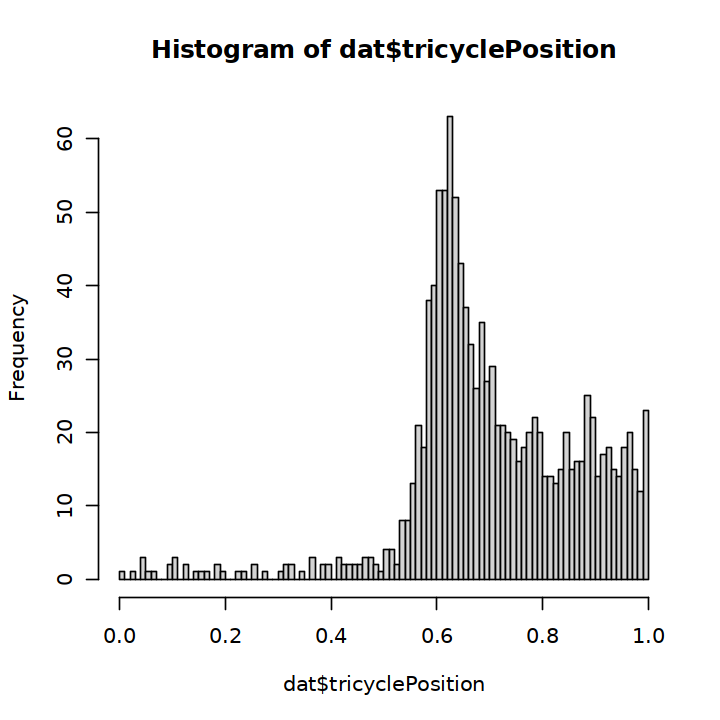

In [57]:
options(repr.plot.width = 6, repr.plot.height = 6)
hist(dat$tricyclePosition, breaks=100)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


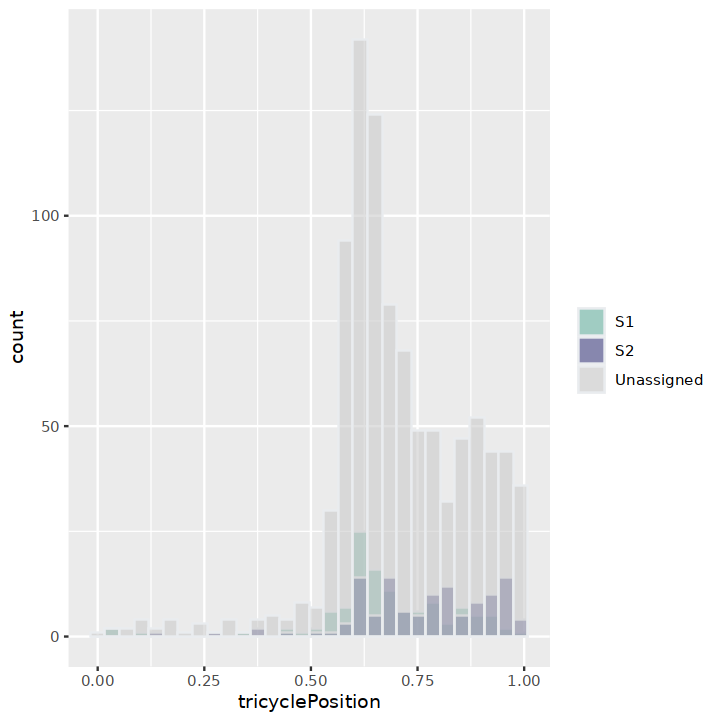

In [58]:
dat %>%
  ggplot( aes(x=tricyclePosition, fill=anno)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080","#cccccc")) +
    #theme_ipsum() +
    labs(fill="")

In [59]:
table(dat$anno)


        S1         S2 Unassigned 
       117        117        943 

## Find Markers

In [60]:
rc.re <- CreateSeuratObject(rc.sub@assays$RNA@data)
rc.re$upper_lower_anno <- dat$anno
rc.re <- subset(rc.re, cells=colnames(rc.re)[rc.re$upper_lower_anno !="Unassigned"])
Idents(rc.re) <- rc.re$upper_lower_anno

In [61]:
Clust_Markers <- FindAllMarkers(rc.re, only.pos = TRUE)

Calculating cluster S1

Calculating cluster S2



In [62]:
Clust_Markers <- Clust_Markers %>% filter(p_val <0.01) %>% arrange(p_val_adj)

In [63]:
Clust_Markers

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene     
AT5G05690 9.510987e-27 1.0177259  0.889 0.171 1.654531e-22 S2      AT5G05690
AT1G79430 4.910976e-15 1.8303819  0.752 0.333 8.543135e-11 S1      AT1G79430
AT1G62045 2.394913e-13 2.3124610  0.487 0.077 4.166191e-09 S1      AT1G62045
AT1G78040 8.201470e-13 1.0337960  1.000 0.991 1.426728e-08 S1      AT1G78040
AT4G13600 8.346298e-13 1.4472378  0.436 0.043 1.451922e-08 S1      AT4G13600
AT3G57150 1.068495e-12 0.8629181  0.821 0.444 1.858754e-08 S2      AT3G57150
AT5G40630 1.317009e-12 0.5834987  0.607 0.162 2.291069e-08 S2      AT5G40630
AT3G17730 1.459630e-12 2.0465267  0.402 0.026 2.539172e-08 S1      AT3G17730
AT2G44120 2.968049e-12 0.6866236  0.974 0.957 5.163219e-08 S2      AT2G44120
AT5G11100 3.882707e-12 0.6616619  0.547 0.128 6.754356e-08 S1      AT5G11100
AT1G67430 4.389210e-12 0.4341335  1.000 1.000 7.635470e-08 S2      AT1G67430
AT5G54660 4.602154e-12 1.1839677  0.547 0.154 8.005908e-08 S1      AT5G54660
AT2G27030 4.698602e-12 0.9914067  1.000 0.974 8.173688e-08 S1      AT2G27030
AT5G50720 4.788652e-12 1.5725179  0.709 0.274 8.330339e-08 S1      AT5G50720
AT3G18670 6.497293e-12 0.8584067  0.385 0.026 1.130269e-07 S1      AT3G18670
AT1G69970 7.611523e-12 1.8965612  0.538 0.145 1.324101e-07 S1      AT1G69970
AT3G23830 8.800328e-12 0.8041325  0.846 0.513 1.530905e-07 S2      AT3G23830
AT3G53620 1.619160e-11 1.3254813  0.846 0.726 2.816690e-07 S1      AT3G53620
AT3G15357 2.592391e-11 0.6022229  0.795 0.350 4.509723e-07 S2      AT3G15357
AT1G08500 3.034708e-11 0.8530849  0.393 0.043 5.279178e-07 S1      AT1G08500
AT4G13850 3.286909e-11 0.6208412  0.915 0.615 5.717907e-07 S2      AT4G13850
AT1G54330 3.567361e-11 1.4640766  0.419 0.060 6.205781e-07 S1      AT1G54330
AT1G65910 3.925331e-11 1.2814174  0.376 0.034 6.828505e-07 S1      AT1G65910
AT2G19460 3.938409e-11 1.5950227  0.632 0.248 6.851256e-07 S1      AT2G19460
AT2G18380 4.339806e-11 2.3768423  0.453 0.094 7.549527e-07 S1      AT2G18380
AT1G27920 4.619798e-11 0.7066776  0.350 0.017 8.036600e-07 S1      AT1G27920
AT1G28395 4.927537e-11 0.5347208  0.855 0.496 8.571944e-07 S2      AT1G28395
AT2G41430 5.176302e-11 1.0864806  0.991 0.991 9.004696e-07 S1      AT2G41430
AT1G26880 5.487088e-11 0.4485385  1.000 1.000 9.545338e-07 S2      AT1G26880
AT2G27510 6.605192e-11 0.6633250  0.983 0.872 1.149039e-06 S2      AT2G27510
...       ...          ...        ...   ...   ...          ...     ...      
AT1G68560 0.0004648052 0.4427290  0.359 0.162 1            S2      AT1G68560
AT5G46430 0.0004691934 0.2695621  0.991 1.000 1            S2      AT5G46430
AT5G15520 0.0004756162 0.2720809  0.974 0.923 1            S2      AT5G15520
AT5G35360 0.0004849552 0.2782917  0.923 0.692 1            S2      AT5G35360
AT1G30580 0.0005436506 0.3074841  0.966 0.863 1            S2      AT1G30580
AT4G38740 0.0005536737 0.3112848  1.000 0.957 1            S2      AT4G38740
AT4G26190 0.0005687662 0.2670946  0.949 0.744 1            S2      AT4G26190
AT2G31410 0.0005925179 0.3005031  0.872 0.812 1            S2      AT2G31410
AT1G69700 0.0007149404 0.3430698  0.778 0.564 1            S2      AT1G69700
AT1G54050 0.0007966367 0.3250716  0.453 0.239 1            S2      AT1G54050
AT2G01140 0.0010155677 0.3216506  0.974 0.863 1            S2      AT2G01140
AT3G06355 0.0011133054 0.9501064  0.974 0.983 1            S2      AT3G06355
AT1G07370 0.0011283879 0.2879332  0.744 0.470 1            S2      AT1G07370
AT3G54470 0.0011510533 0.2698479  0.923 0.752 1            S2      AT3G54470
AT2G28790 0.0012193291 0.4119428  0.949 0.872 1            S2      AT2G28790
AT2G28000 0.0012580871 0.2603742  0.701 0.453 1            S2      AT2G28000
AT4G39260 0.0012618168 0.3356570  0.991 0.940 1            S2      AT4G39260
AT4G34870 0.0012663596 0.2804306  1.000 1.000 1            S2      AT4G34870
AT5G47320 0.0013608532 0.2577975  0.906 0.735 1            S2      AT5G47320
AT1G28290 0.0013639165 0.2591225  0.453 0.274 1            S2      AT1G28290
AT5G20

In [64]:
write.csv(Clust_Markers, "./tradeseq/Phloem_Atlas_G1_Upper_Lower_cells_DE_20240503.csv")

## GO of Upper and Lower cell markers

In [65]:
## Prepare gene module list
module_sel <- select(Clust_Markers, gene, cluster)
module_list <- split(module_sel, f=module_sel$cluster)
#this makes list from long df of gene lists - TARGET is what we want to keep
module_list  <- lapply(module_list, function(x) x[names(x)=="gene"])
# convert each sublist into character and eliminate duplicates
module_list  <- lapply(module_list, function(x) as.character(unique(x$gene)))

In [66]:
cluster_GO <- gost(module_list, organism = "athaliana", correction_method = "fdr", significant = F, multi_query = F)

cluster_GO_df <- cluster_GO[[1]]

cluster_GO_sig <- filter(cluster_GO_df, p_value<=0.01)

# top  terms for each cluster

cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=4) %>%
  group_by(query) %>%
  top_n(5, wt = -p_value) %>%
  arrange(desc(p_value)) -> top_GO

GO_n <- cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=4) %>%
  group_by(term_id) %>%
  tally() %>%
  arrange(desc(n))


GO_n <- dplyr::rename(GO_n, "n_clusters"=n)

cluster_GO_sig_n <- left_join(cluster_GO_sig, GO_n)

# get all terms for the top ones so that all clusters have values

top_GO_all <- filter(cluster_GO_df, term_id %in% top_GO$term_id)


#spread and plot


top_GO_sel <- select(top_GO_all, query, p_value, term_id, term_name)

spread_GO <- spread(top_GO_sel, key = query, p_value)

spread_GO[is.na(spread_GO)] <- 1

spread_GO_m <- as.matrix(-log10(spread_GO[3:ncol(spread_GO)]))
rownames(spread_GO_m) <- spread_GO$term_name

Joining with `by = join_by(term_id)`


In [67]:
head(cluster_GO_sig)

query significant p_value      term_size query_size intersection_size
1 S1    TRUE        3.958123e-31 436       603        71               
2 S1    TRUE        2.297663e-23 752       603        81               
3 S1    TRUE        8.723130e-23 976       603        92               
4 S1    TRUE        1.713723e-22 712       603        77               
5 S1    TRUE        3.336778e-22 812       603        82               
6 S1    TRUE        6.497090e-22 841       603        83               
  precision recall     term_id    source term_name                            
1 0.1177446 0.16284404 GO:0016192 GO:BP  vesicle-mediated transport           
2 0.1343284 0.10771277 GO:0045184 GO:BP  establishment of protein localization
3 0.1525705 0.09426230 GO:0051641 GO:BP  cellular localization                
4 0.1276949 0.10814607 GO:0015031 GO:BP  protein transport                    
5 0.1359867 0.10098522 GO:0008104 GO:BP  protein localization                 
6 0.1376451 0.09869203 GO:0070727 GO:BP  cellular macromolecule localization  
  effective_domain_size source_order parents     
1 21899                  5229        GO:00068....
2 21899                 11702        GO:00081....
3 21899                 14309        GO:00099....
4 21899                  4854        GO:00451....
5 21899                  3157          GO:0070727
6 21899                 16772        GO:00330....

In [669]:
write.csv(cluster_GO_sig[,-14], "./tradeseq/Phloem_Atlas_G1_Upper_Lower_cells_GO_20240503.csv")

In [68]:
cluster_GO_sig <- read.csv("./tradeseq/Phloem_Atlas_G1_Upper_Lower_cells_GO_20240503_selected.csv")

In [70]:
cluster_GO_sig <- cluster_GO_sig %>% filter(include=="y")

In [71]:
cluster_GO_sig

X   query significant p_value      term_size query_size intersection_size
1    1 S1    TRUE        3.960000e-31  436      603         71              
2    5 S1    TRUE        3.340000e-22  812      603         82              
3   14 S1    TRUE        1.740000e-11  457      603         45              
4   47 S1    TRUE        1.636065e-03  421      603         27              
5   48 S1    TRUE        1.656147e-03  693      603         38              
6  222 S2    TRUE        7.940000e-72 1403      419        152              
7  227 S2    TRUE        4.120000e-63 5270      419        264              
8  233 S2    TRUE        3.690000e-57 7313      419        301              
9  257 S2    TRUE        2.960000e-08  152      419         18              
10 260 S2    TRUE        4.470000e-06    4      419          4              
   precision   recall     term_id    source
1  0.117744610 0.16284404 GO:0016192 GO:BP 
2  0.135986733 0.10098522 GO:0008104 GO:BP 
3  0.074626866 0.09846827 GO:0051649 GO:BP 
4  0.044776119 0.06413302 GO:0016049 GO:BP 
5  0.063018242 0.05483405 GO:0071554 GO:BP 
6  0.362768496 0.10833927 GO:0006412 GO:BP 
7  0.630071599 0.05009488 GO:0010467 GO:BP 
8  0.718377088 0.04115958 GO:0009058 GO:BP 
9  0.042959427 0.11842105 GO:0006457 GO:BP 
10 0.009546539 1.00000000 GO:0006858 GO:BP 
   term_name                             effective_domain_size source_order
1  vesicle-mediated transport            21899                  5229       
2  protein localization                  21899                  3157       
3  establishment of localization in cell 21899                 14317       
4  cell growth                           21899                  5141       
5  cell wall organization or biogenesis  21899                 17260       
6  translation                           21899                  2194       
7  gene expression                       21899                  4207       
8  biosynthetic process                  21899                  3271       
9  protein folding                       21899                  2227       
10 extracellular transport               21899                  2551       
   include
1  y      
2  y      
3  y      
4  y      
5  y      
6  y      
7  y      
8  y      
9  y      
10 y

In [72]:
cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=4) %>%
  group_by(query) %>%
  top_n(10, wt = -p_value) %>%
  arrange(desc(p_value)) -> top_GO

GO_n <- cluster_GO_sig %>%
  filter(source=="GO:BP", intersection_size>=4) %>%
  group_by(term_id) %>%
  tally() %>%
  arrange(desc(n))


GO_n <- dplyr::rename(GO_n, "n_clusters"=n)

cluster_GO_sig_n <- left_join(cluster_GO_sig, GO_n)

# get all terms for the top ones so that all clusters have values

top_GO_all <- filter(cluster_GO_df, term_id %in% top_GO$term_id)


#spread and plot


top_GO_sel <- select(top_GO_all, query, p_value, term_id, term_name)

spread_GO <- spread(top_GO_sel, key = query, p_value)

spread_GO[is.na(spread_GO)] <- 1

spread_GO_m <- as.matrix(-log10(spread_GO[3:ncol(spread_GO)]))
rownames(spread_GO_m) <- spread_GO$term_name

Joining with `by = join_by(term_id)`


In [73]:
spread_GO_m

S1        S2       
translation                            0.000000 71.099944
protein folding                        3.106984  7.528682
extracellular transport                0.000000  5.350108
protein localization                  21.476673  0.000000
biosynthetic process                   0.000000 56.432419
gene expression                        0.000000 62.385030
cell growth                            2.786199  0.000000
vesicle-mediated transport            30.402511  0.000000
establishment of localization in cell 10.760539  0.000000
cell wall organization or biogenesis   2.780901  0.000000

In [77]:
(spread_GO_m <- spread_GO_m[-2,])

S1        S2       
translation                            0.000000 71.099944
extracellular transport                0.000000  5.350108
protein localization                  21.476673  0.000000
biosynthetic process                   0.000000 56.432419
gene expression                        0.000000 62.385030
cell growth                            2.786199  0.000000
vesicle-mediated transport            30.402511  0.000000
establishment of localization in cell 10.760539  0.000000
cell wall organization or biogenesis   2.780901  0.000000

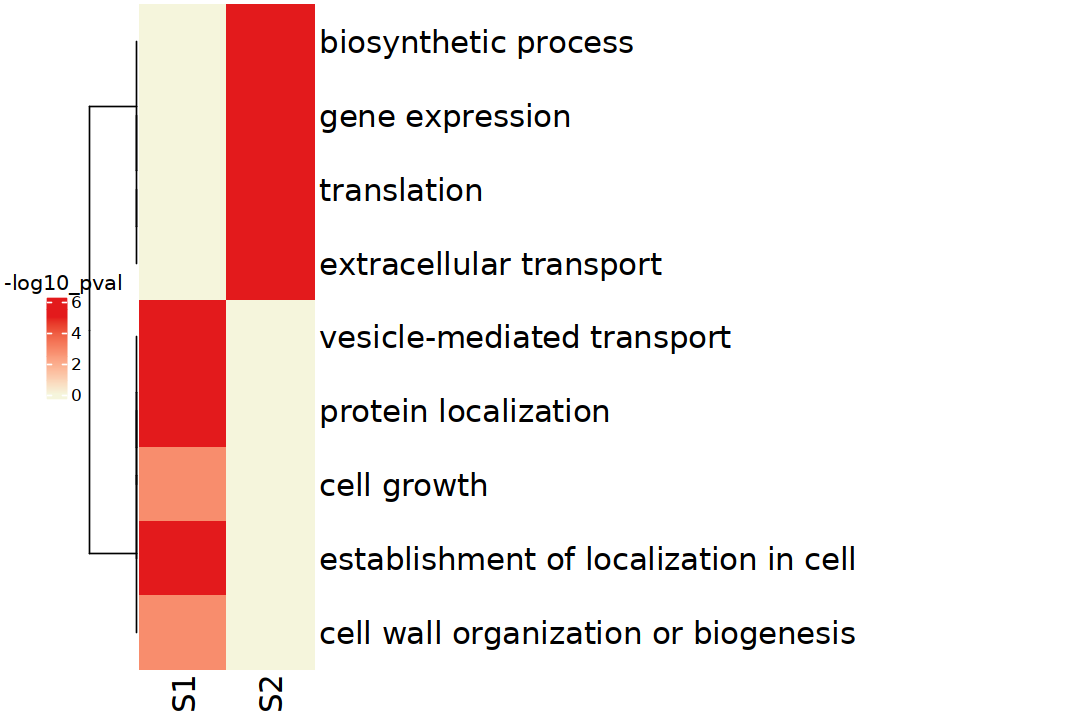

In [78]:
options(repr.plot.width = 9, repr.plot.height = 6)

GO_hm <- Heatmap(spread_GO_m, 
                 name = "-log10_pval", 
                 heatmap_legend_param = list(title_position="topcenter", color_bar = "continuous",title_gp = grid::gpar(fontsize = 12)), 
                 col = colorRamp2(c(0, 5), 
                                  c("beige", "#e31a1c")), 
                 cluster_rows = T,
                 cluster_columns = F, 
                 use_raster= FALSE, 
                 show_column_names = TRUE, 
                 show_row_names = TRUE, 
                 show_row_dend = TRUE, 
                 show_column_dend = TRUE, 
                column_title_gp = grid::gpar(fontsize = 18),
                column_names_gp = grid::gpar(fontsize = 18),
                 clustering_distance_rows = "pearson",
                 clustering_distance_columns = "pearson", 
                 row_names_gp = gpar(fontsize = 18)) 


# padding - bottom, left, top, right
draw(GO_hm, padding = unit(c(1, 10, 1, 100), "mm"), heatmap_legend_side = "left")

In [79]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_GO_20240503.pdf",width=9, height=6)
draw(GO_hm, padding = unit(c(1, 10, 1, 100), "mm"), heatmap_legend_side = "left")
dev.off()

png 
  2

## Gene Expression

In [670]:
GL3 <- read.csv("./tradeseq/BR_bsn_genes.csv")

In [671]:
GL3

Name     AGI       
1 DWF4     AT3G50660 
2 CPD      AT5G05690 
3 DET2     AT2G38050 
4 ROT3     AT4G36380 
5 CYP90D1  AT3G13730 
6 BR6OX1   AT5G38970 
7 BR6OX2    AT3G30180

In [672]:
rc.sub <- subset(rc.sub,cells=dat$cell_id)

In [673]:
rc.sub$anno <- dat$anno

[1] 0.6682927

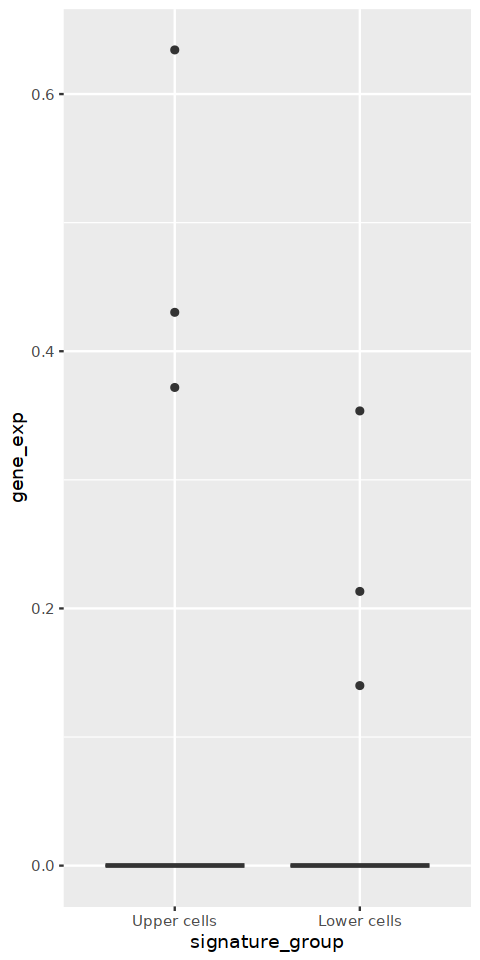

In [674]:
# BAS1 catabolic gene
geneid <- 'AT2G26710'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


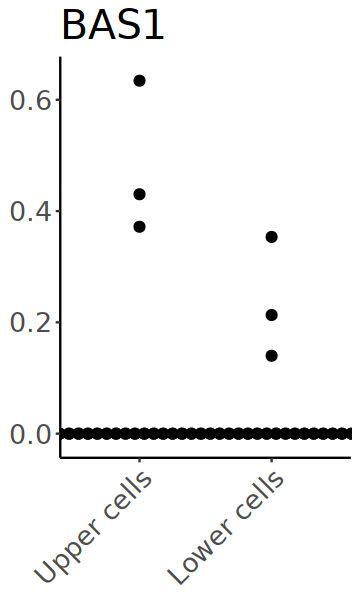

In [675]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
geom_dotplot(binaxis='y', stackdir='center',
               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("BAS1")

In [676]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_BAS1_Exp.pdf",width=3, height=4)
print(ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
geom_dotplot(binaxis='y', stackdir='center',
               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("BAS1"))
dev.off()

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


png 
  2

[1] 0.0195122

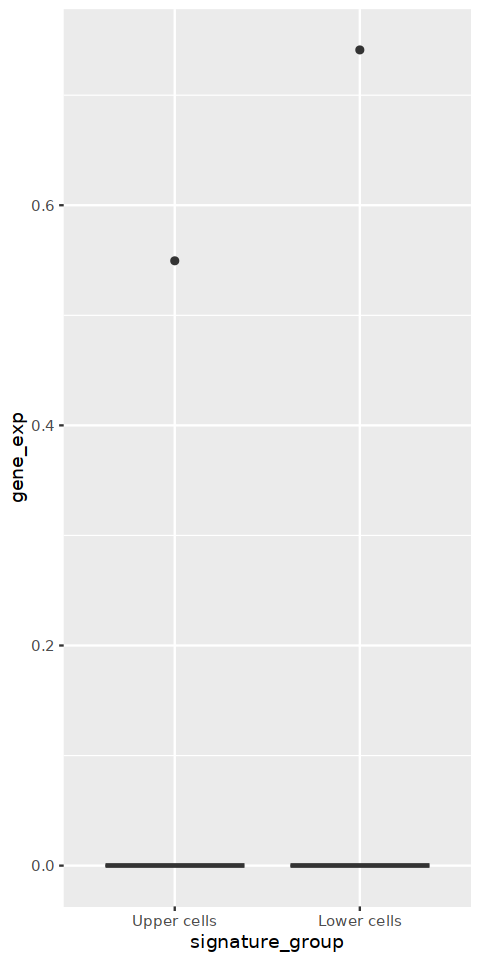

In [677]:
# SOB7 catabolic gene
geneid <- 'AT1G17060'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 0.07804878

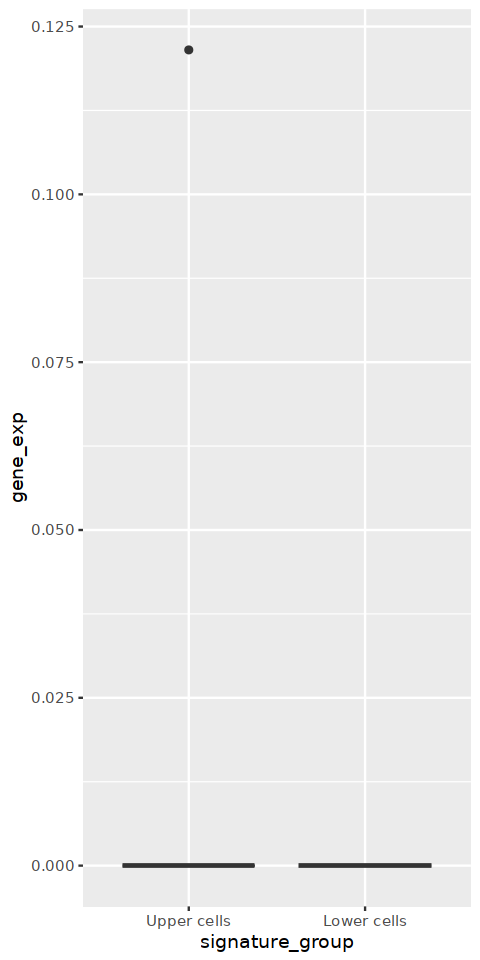

In [678]:
# BEN1 catabolic gene
geneid <- 'AT2G45400'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 2.612195

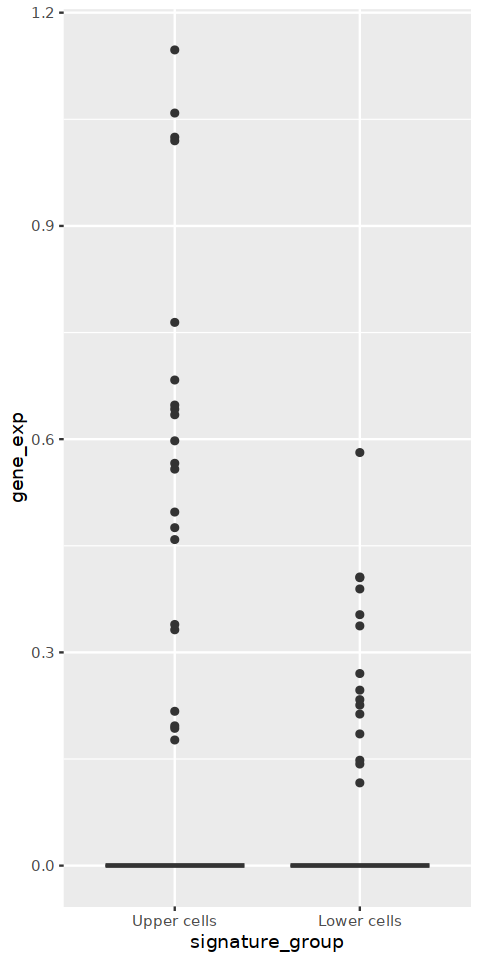

In [679]:
#OPS
geneid <- 'AT3G09070'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


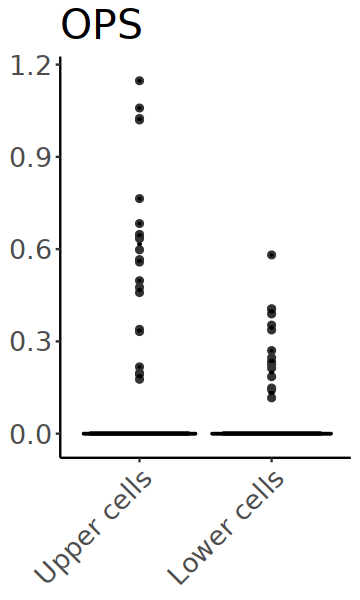

In [680]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
geom_dotplot(binaxis='y', stackdir='center',
               stackratio=1, dotsize=0.1)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("OPS")

[1] 0.8560976

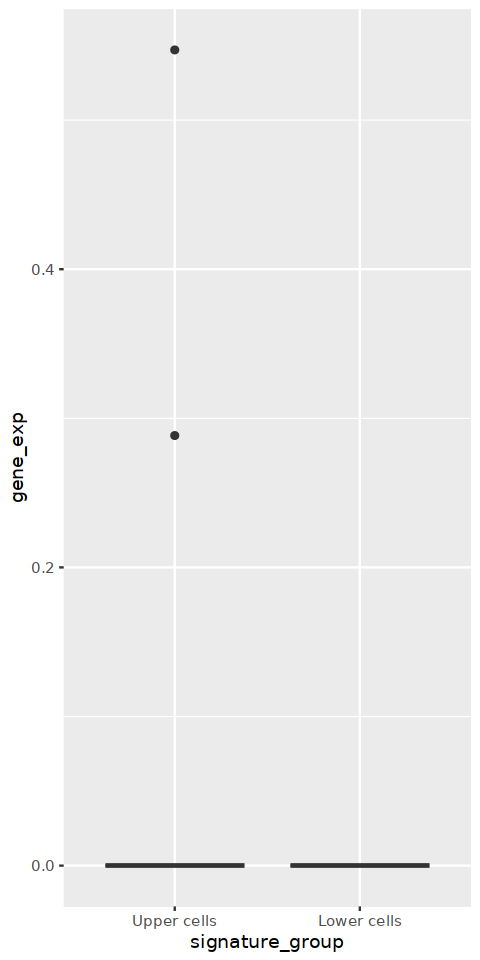

In [681]:
#OPL2
geneid <- 'AT2G38070'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 4.670732

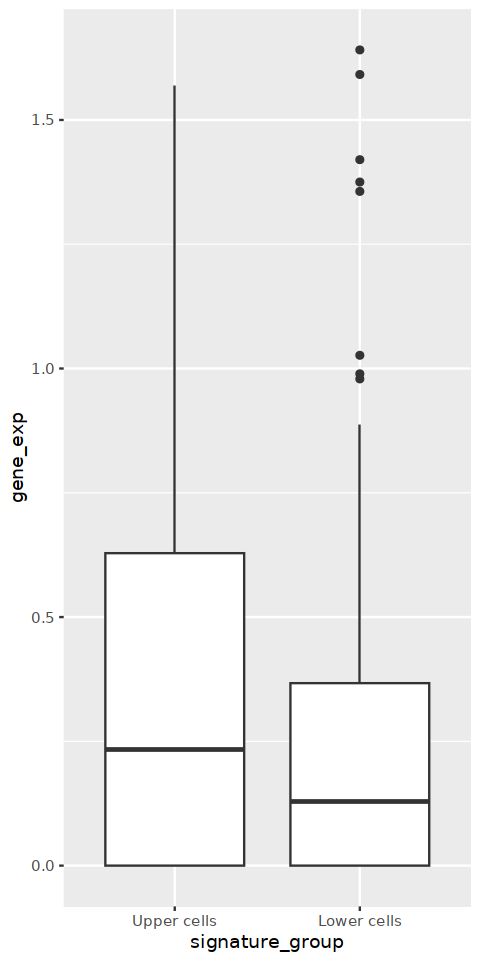

In [682]:
# CSI1
geneid <- 'AT2G22125'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

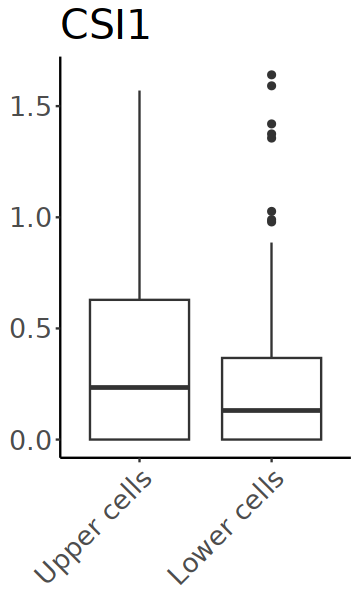

In [683]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.1)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("CSI1")

In [684]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_CSI1_Exp.pdf",width=3, height=4)
print(ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#              stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("CSI1"))
dev.off()

png 
  2

[1] 6.504878

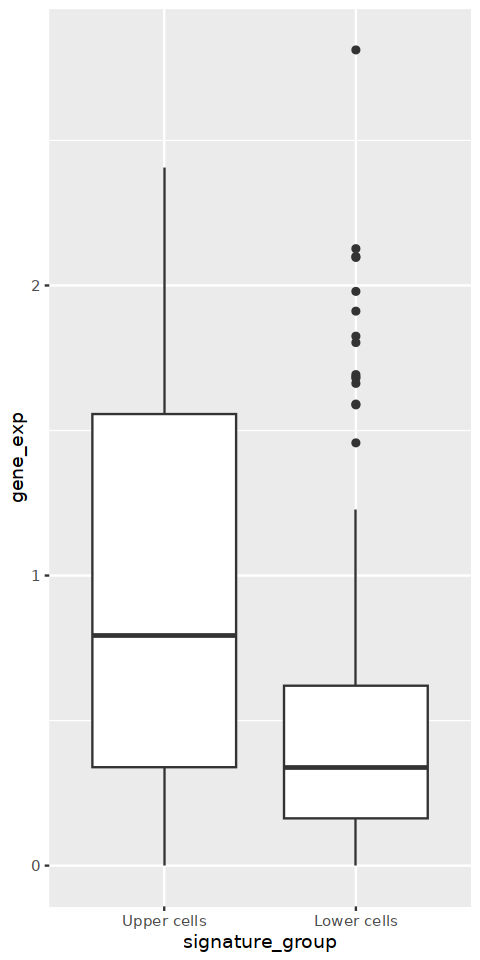

In [685]:
# CESA6
geneid <- 'AT5G64740'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

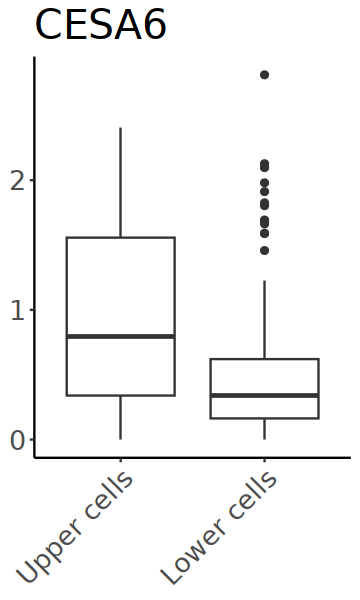

In [686]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.2)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("CESA6")

In [687]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_CESA6_Exp.pdf",width=3, height=4)
print(ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("CESA6"))
dev.off()

png 
  2

[1] 1.360976

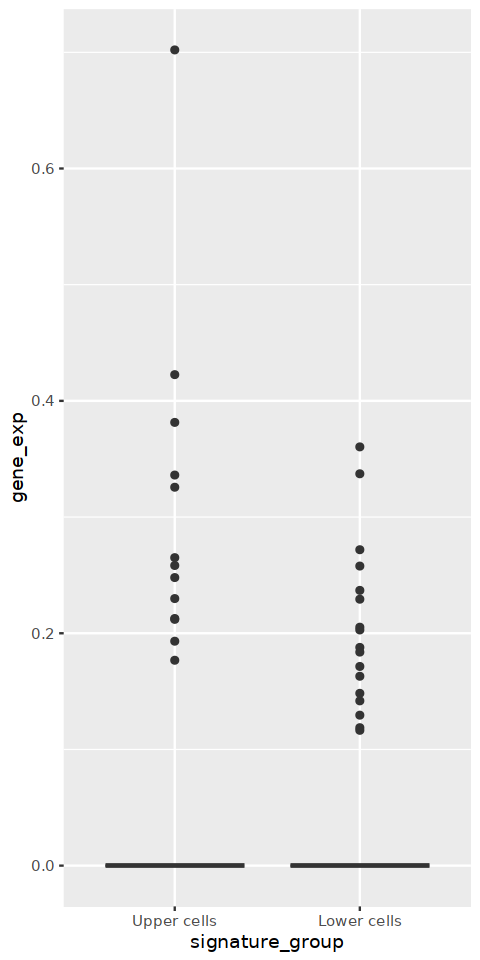

In [688]:
# DET2
geneid <- 'AT2G38050'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 0.1512195

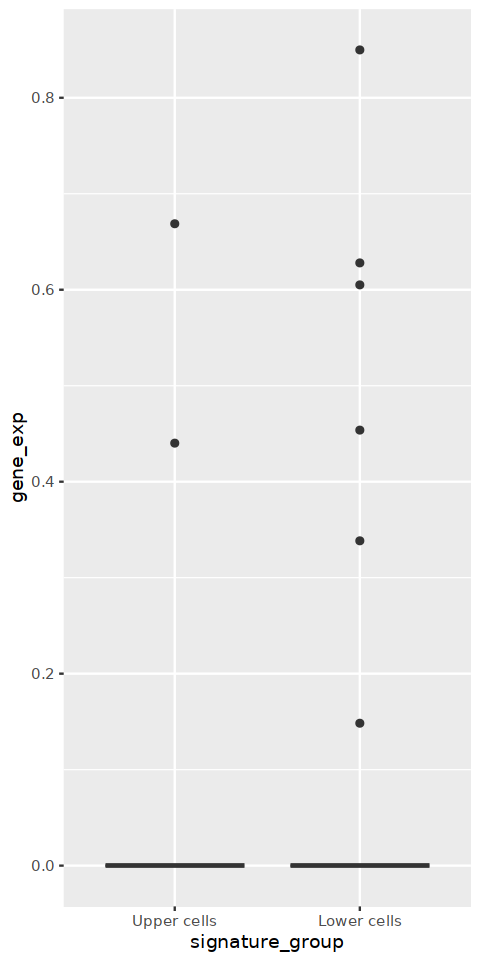

In [689]:
# ROT3
geneid <- 'AT4G36380'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 0.0195122

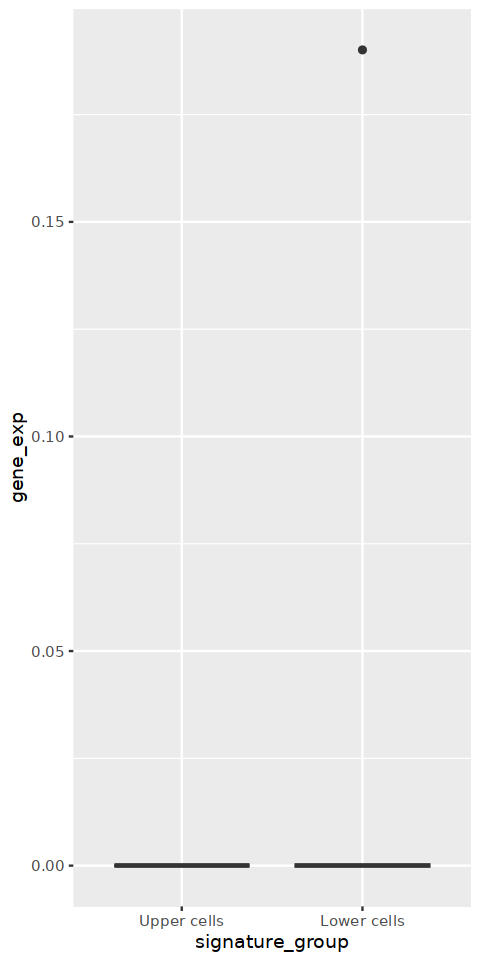

In [690]:
# CYP90D1
geneid <- 'AT3G13730'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 0.4414634

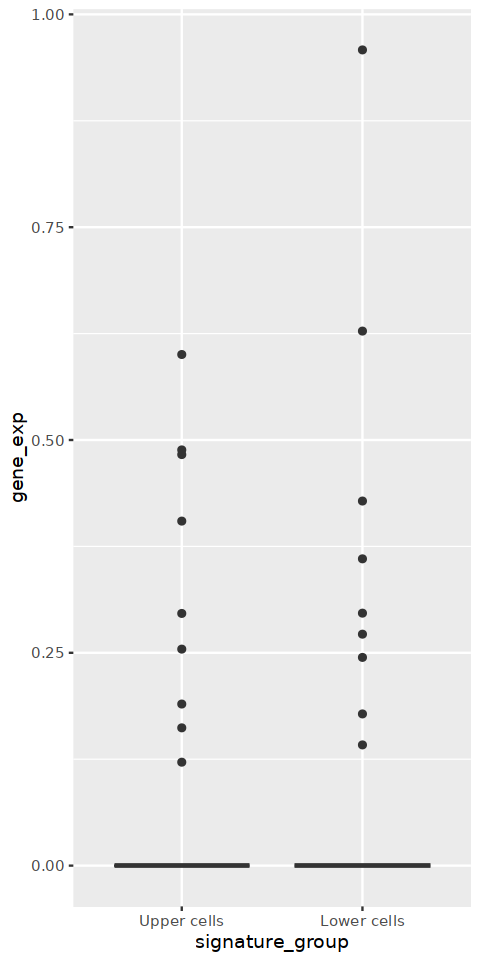

In [691]:
# BR6OX1
geneid <- 'AT5G38970'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

[1] 3.026829

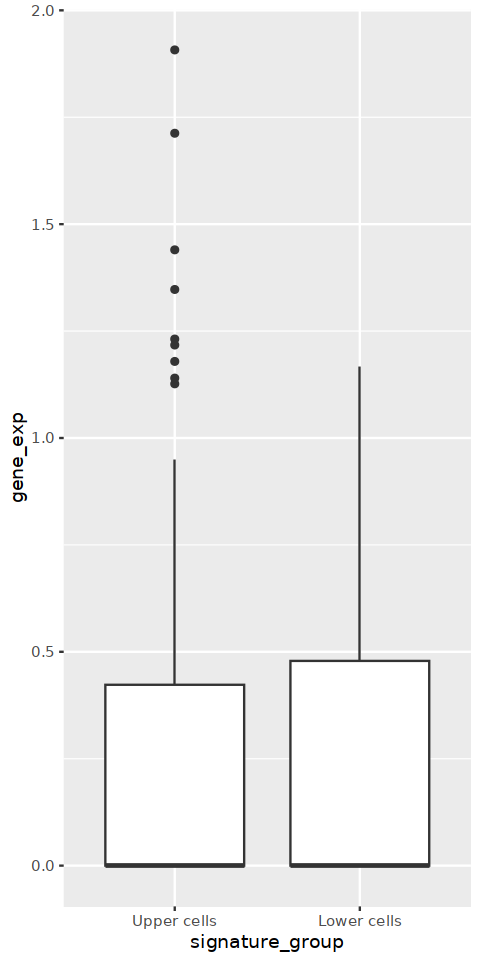

In [692]:
# BR6OX2
geneid <- 'AT3G30180'
## Percentage expressed
length(which(rc.integrated$RNA@data[geneid,]>0))/410
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

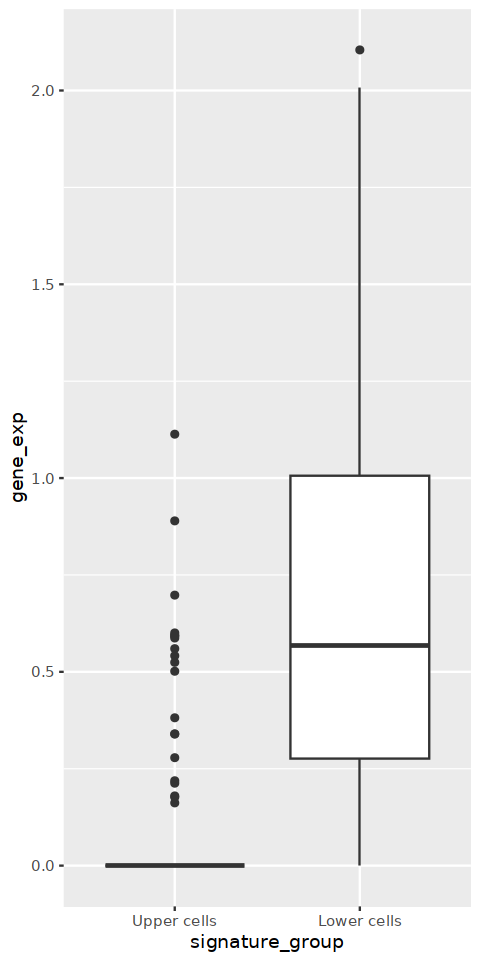

In [693]:
#CPD(AT5G05690)
geneid <- 'AT5G05690'
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

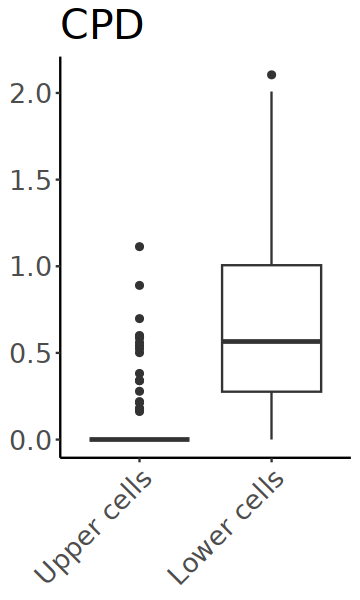

In [694]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.1)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("CPD")

In [695]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_CPD_Exp.pdf",width=3, height=4)
print(ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("CPD"))
dev.off()

png 
  2

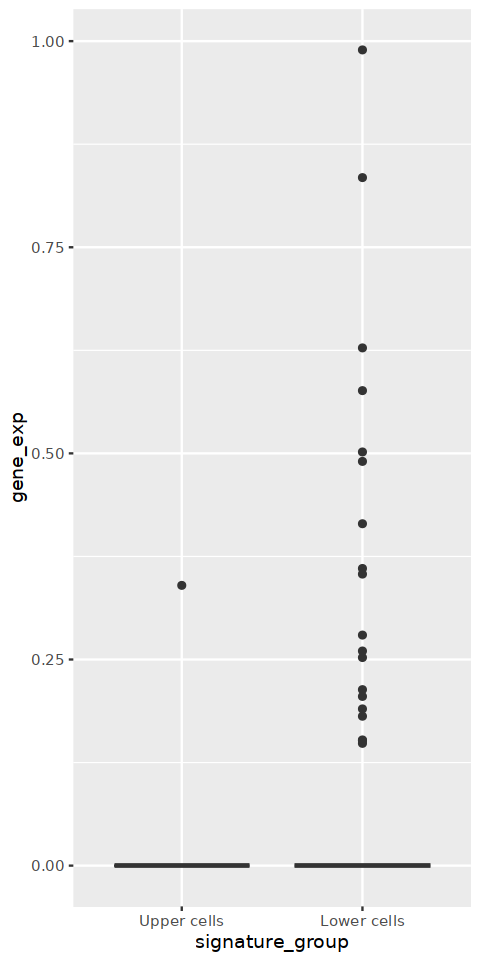

In [696]:
#DWF(AT3G50660)
geneid <- 'AT3G50660'
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

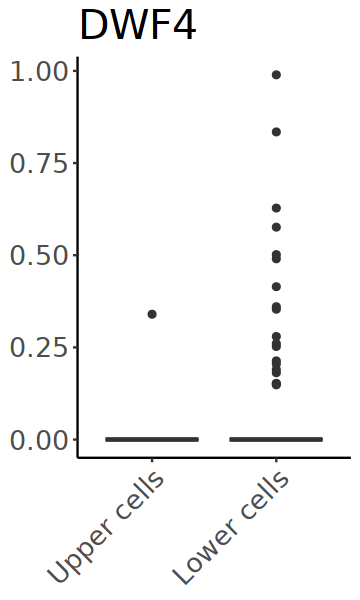

In [697]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("DWF4")

In [698]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_DWF4_Exp.pdf",width=3, height=4)
print(ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("DWF4"))
dev.off()

png 
  2

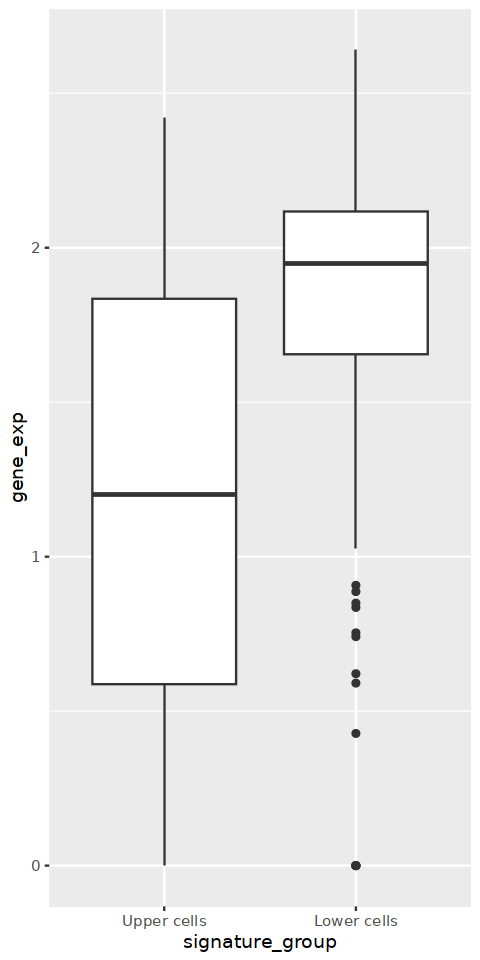

In [699]:
#PHB3(AT3G50660)
geneid <- 'AT5G40770'
toplt <- data.frame(gene_exp = c(rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S1")],rc.sub@assays$RNA@data[geneid,which(rc.sub$anno=="S2")]),
                   signature_group = c(rep("Upper cells", length(which(rc.sub$anno=="S1"))), rep("Lower cells", length(which(rc.sub$anno=="S2")))))

toplt$signature_group <- factor(toplt$signature_group, levels= c("Upper cells", "Lower cells"))

# Overlaid histograms
options(repr.plot.width=4, repr.plot.height=8)
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
  geom_boxplot()

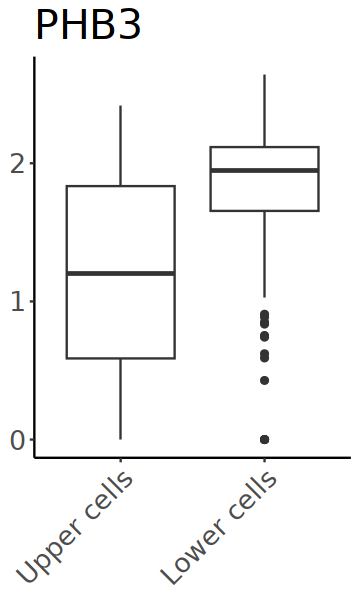

In [700]:
options(repr.plot.width=3, repr.plot.height=5)
# Change dotsize and stack ratio
ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("PHB3")

In [701]:
grDevices::cairo_pdf("./pdfs/Phloem_Atlas_G1_Upper_Lower_cells_PHB3_Exp.pdf",width=3, height=4)
print(ggplot(toplt, aes(x=signature_group, y=gene_exp)) + 
geom_boxplot()+theme_classic()+  
#geom_dotplot(binaxis='y', stackdir='center',
#               stackratio=1, dotsize=0.8)+
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1), axis.title.x = element_blank(),
          axis.title.y = element_blank()) + ggtitle("PHB3"))
dev.off()

png 
  2